# 데이터 모으기

##국토교통부 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
first_='/content/drive/MyDrive/부동산 논문/아파트(매매)_실거래가_'
last_='년도.xlsx'
for i in range(15,21):
  globals()['df_{}'.format(i)] =pd.read_excel(first_+str(i)+last_)

In [ ]:
nation_data = pd.concat([df_15,df_16,df_17,df_18,df_19,df_20],ignore_index=True)

In [ ]:
df15= df_15
df16= df_16
df17= df_17
df18= df_18
df19= df_19
df20= df_20

In [ ]:
nation_merge=pd.DataFrame(nation_data)

In [ ]:
nation_merge

##위도 경도 데이터

In [ ]:
place = pd.read_excel('/content/drive/MyDrive/부동산 논문/위도,경도.xlsx')

##부동산 114 데이터

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [ ]:
import re
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import requests
import selenium
from selenium import webdriver
import time

In [ ]:
def get_town(word):
  comp_data=[]
  comp_data=['No=']

  A0_list=[]

  index=0
  while index > -1:
    index = word.find(comp_data[0], index)
    if index > -1:
      A0_list.append(index)
      index += len(comp_data[0])

  #단어 얻는 코드
  word_list=[]
  for i in range(len(A0_list)):
    word_list.append(word[A0_list[i]+3:A0_list[i]+13])
  word_list=list(word_list)
  return word_list

In [ ]:
def get_apart(word):
  comp_data=[]
  comp_data=['bun=','&amp;mul']

  A0_list=[]
  and_list=[]
  all_list=[A0_list,and_list]
  for i in range(2):
    index=0
    while index > -1:
      index = word.find(comp_data[i], index)
      if index > -1:
        all_list[i].append(index)
        index += len(comp_data[i])

  #단어 얻는 코드
  word_list=[]
  for i in range(len(all_list[0])):
    word_list.append(word[all_list[0][i]+4:all_list[1][i]])
  word_list=list(word_list)
  return word_list

In [ ]:
#   https://m.r114.com/?_c=memul&_m=complex&_a=detail&CortarNo=1168010300&mmCode=A01013&ComplexCd=A01011352300016&ComplexNm=
def get_inform(place,apart):
  #url로 코드 만들기
  url_detail_code = 'https://m.r114.com/?_c=memul&_m=complex&_a=detail&CortarNo='
  url_code = '&mmCode=A01001&ComplexCd='
  last_code ='&ComplexNm='
  url_detail=url_detail_code+place+url_code+apart+last_code

  #고유 header
  headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"

  #가격, 정보 soup 만들기
  r_detail = requests.get(url_detail,headers)
  soup_detail = BeautifulSoup(r_detail.text, 'html.parser')

  #정보 데이터 받아오기
  list_name=[]
  data=[]
  cha="\n,\t,\r"
  detail_soup=soup_detail.find_all('section',class_='box_type1 info_detail')
  table=detail_soup[0].find_all('tr')
  for i in table:
    list_name.append(i.find('th').text)
    word=i.find('td').text
    #cha에 있는 것들 제거
    for x in range(len(cha)):
      word=word.replace(cha[x],'')
    data.append(word)

  #교육시설(어린이집/유치원/학교)
  edu_data = soup_detail.find_all("ul",attrs = {"class":"list_type list_school"})
  str1 = '어린이집'
  str2 = '유치원'
  str3 = '학교'
  for i in edu_data:
    edu = 0
    if i.get_text().find(str1):
      edu = 1
    elif i.get_text().find(str2):
      edu = 1
    elif i.get_text().find(str3):
      edu = 1
  list_name.append('교육시설')
  data.append(edu)

  #지하철
  subway = soup_detail.find("dl", attrs={"class":"list_facility"}).find_all(attrs={"class":"list_subway"})
  list_name.append('지하철')
  for i in subway:
    data.append(i.get_text())

  #생활편의시설
  facil = soup_detail.find("dl", attrs={"class":"list_facility type2"}).find("dd").get_text()
  list_name.append('생활편의시설')
  data.append(facil.count(',')+1)


  #최종 데이터
  name = soup_detail.find("a", attrs={"id":"obj_a_select_apt"}).get_text()
  list_name.append('이름')
  data.append(name)

  #딕셔너리로 만들어 output
  return dict(zip(list_name,data))


In [ ]:
#####################################################################
from bs4 import BeautifulSoup
import requests

def get_114_inform(url):

  headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"
  res = requests.get(url,headers)
  res.raise_for_status
  soup = BeautifulSoup(res.text,"html.parser")

  list_name = []
  data = []

  #교육시설(어린이집/유치원/학교)
  edu_data = soup.find_all("ul",attrs = {"class":"list_type list_school"})
  str1 = '어린이집'
  str2 = '유치원'
  str3 = '학교'
  for i in edu_data:
    edu = 0
    if i.get_text().find(str1):
      edu = 1
    elif i.get_text().find(str2):
      edu = 1
    elif i.get_text().find(str3):
      edu = 1
  list_name.append('교육시설')
  data.append(edu)

  #지하철
  subway = soup.find("dl", attrs={"class":"list_facility"}).find_all(attrs={"class":"list_subway"})
  list_name.append('지하철')
  for i in subway:
    data.append(i.get_text())

  #생활편의시설
  facil = soup.find("dl", attrs={"class":"list_facility type2"}).find("dd").get_text()
  data_table.append('생활편의시설')
  data.append(facil.count(',')+1)

  return dict(zip(data_table,data))

In [ ]:
import time
def get_all_apart(url):
  url1='https://m.r114.com/?_c=memul&_m=list&_a=memul&CortarNo='
  url2='&mmCode=A01011&CortarNm='


  gu_list=[]
  i=0
  while i<len(url):
    num=url[i]
    while True:
      gu_list.append(num)
      num+=100
      if num>url[i+1]:
        break
    i+=2

  bub_list=[]
  apart_list=[]

  for i in range(len(gu_list)):
    url=url1+str(gu_list[i])+url2

    ############################################################################################################################
    print(url)
    ##############################################################################################################################

    #selenium으로 정보 가져온다
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
    driver.get(url)


    prev_height = driver.execute_script("return document.body.scrollHeight")

    #맨 아래로 스크롤
    while True:
        # 스크롤을 화면 가장 아래로 내린다
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

        # 페이지 로딩 대기
        time.sleep(2)

        # 현재 문서 높이를 가져와서 저장
        curr_height = driver.execute_script("return document.body.scrollHeight")
        if(curr_height == prev_height):
            break
        else:
            prev_height = driver.execute_script("return document.body.scrollHeight")

    html=driver.page_source
    headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"
    soup = BeautifulSoup(html, 'html.parser')

    links = soup.select('li > a')


    bub=gu_list[i]
    apart_code=[]
    for i in links:
      apart_data=get_apart(str(i))
      if len(apart_data)==1:
        apart_code.append(apart_data[0])
    bub_list.append(bub)
    apart_list.append(list(set(apart_code)))


  data_code=dict(zip(bub_list,apart_list))
  return data_code

In [ ]:
seoul_list=[1111010100,1111018700 ,1114010100, 1114017400,1117010100,	1117013600,1120010100,	1120012200,1121510100,	1121510900,
            1123010100,	1123011000,1126010100,	1126010600,1129010100,	1129013900,1130510100,	1130510400,1132010500,	1132010800,
            1135010200,	1135010600,1138010100,	1138011400,1141010100,	1141012000,1144010100,1144012700,1147010100,	1147010300,
            1150010100,1150011300,1153010100,	1153011200,1154510100,	1154510300,1156010100,	1156013400,1159010100,	1159010900,
            1162010100,	1162010300	,1165010100,	1165011100,1168010100,	1168011800,1171010100,1171011400,1174010100,1174011000]

In [ ]:
all_apart_information=get_all_apart(seoul_list)

In [ ]:
apart_data=[]
for i in all_apart_information:
  for j in all_apart_information[i]:
    try:
      apart_data.append(get_inform(str(i),str(j)))
    except:
      pass

In [ ]:
print(apart_data)

In [ ]:
import pandas as pd
data_pd=pd.DataFrame(apart_data)

In [ ]:
data_pd

##네이트 부동산 데이터

In [ ]:
import re
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import requests
import selenium
from selenium import webdriver
import time

In [ ]:
url=['https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B5%B5%BA%C0%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B3%EB%BF%F8%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B0%AD%BA%CF%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%C1%DF%B6%FB%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%C0%BA%C6%F2%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B5%BF%B4%EB%B9%AE%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BC%BA%BA%CF%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%C1%BE%B7%CE%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BC%AD%B4%EB%B9%AE%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B8%B6%C6%F7%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BF%EB%BB%EA%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%C1%DF%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BC%BA%B5%BF%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B1%A4%C1%F8%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B0%AD%BC%AD%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BE%E7%C3%B5%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B1%B8%B7%CE%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B1%DD%C3%B5%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BF%B5%B5%EE%C6%F7%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B5%BF%C0%DB%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B0%FC%BE%C7%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BC%AD%C3%CA%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B0%AD%B3%B2%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%BC%DB%C6%C4%B1%B8&type_g=A&type_cd=01^&fromnavi=1',
     'https://estate.nate.com/cp/real/m_gu.asp?only=345&m_=5&g_=&type_m=m&addr1=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&addr2=%B0%AD%B5%BF%B1%B8&type_g=A&type_cd=01^&fromnavi=1'
     ]

In [ ]:
#url 1개로부터 모든 페이지 url 가져오는 함수

def get_all_page(url):
  plus_url=[]
  headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
  driver.get(url)
  html=driver.page_source
  soup = BeautifulSoup(html, 'html.parser')
  pagebar=soup.find(class_='pagination')
  get_all_page=pagebar.find_all("a")
  for i in get_all_page:
    url_name='https://estate.nate.com/cp/real/'+i['href']
    plus_url.append(url_name)
  return plus_url


In [ ]:
#모든 url 가져오기

all_url=[]
#
for i in url:
  all_url.append(i)
  all_url.extend(get_all_page(i))
print(all_url)

In [ ]:
#url_list를 가지고 모든 아파트 url 뽑기

def get_all_nate(url_list):
  links=[]
  for i in range(len(url_list)):
    url=url_list[i]

    #selenium으로 정보 가져온다
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
    driver.get(url)

    html=driver.page_source
    headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"
    soup = BeautifulSoup(html, 'html.parser')

    link_soup=soup.find_all('a',class_='blue')
    for j in link_soup:
      href = j.attrs['href']
      links.append('https://estate.nate.com/cp/real/'+href)
  return links

In [ ]:
#모든 url 뽑기, all_url이 모든 url 정보를 가지고 잇음

every_url=get_all_nate(all_url)

In [ ]:
print(every_url)

In [ ]:
from bs4 import BeautifulSoup
import requests

def nate_get_inform(url):

  #selenium으로 정보 가져온다
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
  driver.get(url)
  html=driver.page_source
  headers = "Mozilla/5.0(Windows NT 10.0, Win64, x64) AppleWebKit/537.36(Gecko와 같은 KHTML) Chrome/94.0.4606.61 Safari/537.36"
  soup = BeautifulSoup(html, 'html.parser')

  data_table = []
  data = []

  #이름
  name_data = soup.find("h4", attrs={"class":"aptname"})
  name = name_data.find("span").get_text().strip()
  data_table.append('이름')
  data.append(name)

 #기본정보
  basic_table = soup.find("div", attrs={"class":"basis_info"}).find("table", attrs={"class":"colTable11"}).find("tbody").find_all("tr")
  #기본정보 table
  for i in basic_table:
    basic_info_table = i.find_all("th", attrs={"scope":"row"})
    for j in basic_info_table:
      data_table.append(j.get_text().strip())

  #기본정보 data
  cha="\xa0,         "
  for i in basic_table:
    basic_info = i.find_all("td")
    for j in basic_info:
        word=j.get_text().strip()
        for k in range(len(cha)):
          word =  word.replace(cha[k],'')#cha에 있는 것들 제거
        data.append(word)


  #단지정보
  apt_table = soup.find("div", attrs={"class":"around_info"}).find("table", attrs={"class":"colTable11"}).find("tbody").find_all("tr")
  #단지정보 table
  for i in apt_table:
    apt_info_table = i.find_all("th", attrs={"scope":"row"})
    for j in apt_info_table:
      data_table.append(j.get_text().strip())
  #단지정보 data
  cha="\xa0"
  for i in apt_table:
    apt_info = i.find_all("td")
    for j in apt_info:
      word = j.get_text().strip()
      for k in range(len(cha)):
          word = word.replace(cha[k],'') #cha에 있는 것들 제거
      data.append(word)

  #취득세
  tax = soup.find("div", attrs={"class":"pay_info"}).find("table", attrs={"class":"colTable11"}).find("tbody").find("td").get_text().strip()
  data_table.append('취득세')
  data.append(tax)
  anw=dict(zip(data_table,data))
  anw['소재지']='서울특별시'+anw['소재지'].split('서울특별시')[1]
  return anw

In [ ]:
data=[]
for i in every_url:
  try:
    small_data=nate_get_inform(i)
    data.append(small_data)
  except:
    pass

In [ ]:
# 0~1000 출력
print(data[0:1001])

In [ ]:
# 1001~2000 출력
print(data[1001:2001])

In [ ]:
# 2001~3000 출력
print(data[2001:3001])

In [ ]:
# 3001~3874 출력
print(data[3001:3875])

In [ ]:
print(data)

In [ ]:
#데이터 판다스로 변환
import pandas as pd
data_pd2=pd.DataFrame(data)

In [ ]:
data_pd2

# 전처리

In [ ]:
import pandas as pd

### 위도 경도 LabelEncoding

In [ ]:
place

###국가교통부 LabelEncoding

In [ ]:
#국가교통부 초기화
nation_data = pd.concat([df_15,df_16,df_17,df_18,df_19,df_20],ignore_index=True)
nation_merge=pd.DataFrame(nation_data)

In [ ]:
nation_merge

In [ ]:
nation_merge=pd.merge(nation_merge,place,on='시군구 도로명')

In [ ]:
nation_merge

In [ ]:
# 시군구, 도로명, 경과년도, 현재년도, 건축년도 삭제
nation_merge.drop(['시군구','번지','경과년도','현재년도','건축년도','시군구 도로명','도로명'],axis=1,inplace=True)

In [ ]:
# 거래금액 * 10000
def cleaning(x) :
  if str(x).find(",") != -1 :
    word=str(x).split(',')
    return word[0]+word[1]
  return str(x)

nation_merge['거래금액(만원)'] = pd.to_numeric(nation_merge['거래금액(만원)'].apply(cleaning).apply(lambda x:x))*10000

In [ ]:
# 국내총생산 * 10억
nation_merge['국내총생산'] = nation_merge['국내총생산']*1000000000

In [ ]:
nation_merge

###부동산114 LabelEncoding

In [ ]:
data_pd=pd.DataFrame(apart_data) #부동산114 초기화

In [ ]:
data_pd

In [ ]:
#면적 지우기, 층수 지우기, 이름 지우기, 용적률 뒤에 다 지우기
data_pd.drop(['면적(공급/전용)','층수', '이름','용적률','건페율','용도지역','용도구역','초고속정보통신','홈네트워크'],axis=1,inplace=True)

In [ ]:
# 단지규모 -> 가구수

for i in range(len(data_pd)):
  start = data_pd['단지규모'][i].find('동')
  end = data_pd['단지규모'][i].find('가')
  data_pd['단지규모'][i] = int(data_pd['단지규모'][i][start+2:end])
data_pd.rename(columns = {'단지규모':'가구 수'}, inplace = True)

In [ ]:
# 입주일 -> 경과일

from datetime import date, datetime
data_pd.rename(columns={'입주일':'경과일'}, inplace=True)
time_now = date(2021, 8, 1)
for i in range(len(data_pd)):
  data_pd['경과일'][i] = str(data_pd['경과일'][i]).replace(".","-")
  if len(data_pd['경과일'][i]) == 7:
    data_pd['경과일'][i] = data_pd['경과일'][i] + '-01'
  elif len(data_pd['경과일'][i]) == 4:
    data_pd['경과일'][i] = data_pd['경과일'][i] + '-01-01'
  time_made = datetime.strptime(data_pd['경과일'][i], '%Y-%m-%d').date()
  delta = time_now - time_made
  data_pd['경과일'][i] = delta.days

In [ ]:
# 주차대수 -> 가구당 대수

for i in range(len(data_pd)):
   data_pd['주차대수'][i] = str(data_pd['주차대수'][i])
for i in range(len(data_pd)):
  start = data_pd['주차대수'][i].find('당')
  if start >= 0:
    data_pd['주차대수'][i] = (float(data_pd['주차대수'][i][start+1:-2]))
  else:
    data_pd['주차대수'][i] = (0)



In [ ]:
# 단지기본시설 -> 갯수
for i in range(len(data_pd)):
  data_pd['단지기본시설'][i] = str(data_pd['단지기본시설'][i])
for i in range(len(data_pd)):
  if data_pd['단지기본시설'][i].count(' ') != 0:
    cnt = 0
    cnt = cnt + data_pd['단지기본시설'][i].count(' ') + 1
  else:
    cnt = 0
  data_pd['단지기본시설'][i] = (cnt)
data_pd.rename(columns = {'단지기본시설':'단지 기본시설'}, inplace = True)

In [ ]:
# 지하철 -> 이름 교통정보로
data_pd.rename(columns = {'지하철':'교통정보'}, inplace = True)

In [ ]:
# 난방정보 -> 난방연료/방식
data_pd.rename(columns = {'난방정보':'난방연료/방식'}, inplace = True)

In [ ]:
data_pd

### 네이트부동산 LabelEncoding
1. 이름 삭제
2. 건설회사, 건축물 용도, 난방, 방향, 현관 구조 -> one-hot encoding
3. 관리비-> '원'빼기
4. 교육 시설 -> 있으면 1, 없으면 0
5. 기본 시설 -> 갯수
6. 단지 규모 -> 가구 수
7. 주차 대수 -> 가구당 개수로
8. 면적 -> 평수로 바꾸자, 전용률을 따로 빼기
9. 방수/욕실수 -> 쪼개기
10. 사용승인일 삭제
11. 소재지는 논문 읽고 결정###################
12. 입주가능일 -> 삭제
13. 입주년도 -> 2021년 8월 1일에서 뺀다(일수로 나타냄)(경과 년도)
14. 취득세 -> 만원 삭제
15. 편의 시설 -> 갯수
16. 해당면적세대수 -> 삭제
17. 해당층/총층수 -> 총층수
18. 교통정보 수정


In [ ]:
data = data1 + data2 + data3 + data4
data_pd2=pd.DataFrame(data) #네이트부동산 초기화

In [ ]:
data_pd2

In [ ]:
# 4. 교육 시설 -> 있으면 1, 없으면 0
for i in range(len(data_pd2['교육시설'])):
  if len(data_pd2['교육시설'][i])==0:
    data_pd2['교육시설'][i]=0
  else:
    data_pd2['교육시설'][i]=1

In [ ]:
#5.기본 시설 -> 갯수
for i in range(len(data)):
  if data_pd2['단지 기본시설'][i].count(',') != 0:
    cnt = 0
    cnt = cnt + data_pd2['단지 기본시설'][i].count(',') + 1
  else:
    cnt = 0
  data_pd2['단지 기본시설'][i] = cnt

In [ ]:
#6.단지 규모 -> 가구 수
family_list = []
for i in range(len(data)):
  start = data_pd2['단지규모(주차대수)'][i].find('총')
  end = data_pd2['단지규모(주차대수)'][i].find('가')
  family_list.append(data_pd2['단지규모(주차대수)'][i][start+2:end-1].replace(',', '').strip())
  family_list = list(map(int, family_list))
data_pd2['가구 수'] = family_list

In [ ]:
#7.주차 대수 -> 가구당 개수로
for i in range(len(data)):
  start = data_pd2['단지규모(주차대수)'][i].find('당')
  if start >= 0:
    data_pd2['단지규모(주차대수)'][i] = float(data_pd2['단지규모(주차대수)'][i][start+1:-3])
  else:
    data_pd2['단지규모(주차대수)'][i] = 0
data_pd2.rename(columns = {'단지규모(주차대수)':'주차대수'}, inplace = True)

In [ ]:
#8. 면적 -> 평수로 바꾸자, 전용률을 따로 빼기
name= data_pd2['면적(공급/전용)'].str.split('(')
area=name.str.get(0).str.split('/')
data_pd2['평수']=(pd.to_numeric(area.str.get(1).str.replace('㎡',''))*0.3025).round(0)
new_name=name.str.get(1).str.replace('전용률','')
new_name=new_name.str.replace('%','')
data_pd2['전용률']=pd.to_numeric(new_name.str.replace(')',''))

In [ ]:
#9.방수/욕실수 -> 쪼개기

count= data_pd2['방수/욕실수'].str.split('/')
data_pd2['방수']=pd.to_numeric(count.str.get(0).str.replace('개',''))
data_pd2['욕실수']=pd.to_numeric(count.str.get(0).str.replace('개',''))

In [ ]:
#13.입주년도 -> 2021년 8월 1일에서 뺀다(일수로 나타냄)(경과 년도)
from datetime import date, datetime
data_pd2.rename(columns={'입주년도':'경과일'}, inplace=True)
time_now = date(2021, 8, 1)
for i in range(len(data)):
  data_pd2['경과일'][i] = str(data_pd2['경과일'][i]).replace(".","-")
  if len(data_pd2['경과일'][i]) == 7:
    data_pd2['경과일'][i] = data_pd2['경과일'][i] + '-01'
  elif len(data_pd2['경과일'][i]) == 4:
    data_pd2['경과일'][i] = data_pd2['경과일'][i] + '-01-01'
  time = datetime.strptime(data_pd2['경과일'][i], '%Y-%m-%d').date()
  delta = time_now - time
  data_pd2['경과일'][i] = delta.days

In [ ]:
#15.편의 시설 -> 갯수
for i in range(len(data)):
  if data_pd2['편의시설'][i].count(',') != 0:
    cnt = 0
    cnt = cnt + data_pd2['편의시설'][i].count(',') + 1
  else:
    cnt = 0
  data_pd2['편의시설'][i] = cnt
data_pd2.rename(columns = {'편의시설':'생활편의시설'}, inplace = True)

In [ ]:
# 17. 해당층/총층수 -> 총층수
# str값으로 되어잇음!!!(데이터가 없는게 있어서 숫자로 못바꿈)
floor= data_pd2['해당층/총층'].str.split('/')
data_pd2['총층수']=floor.str.get(1).str.replace('층','')

In [ ]:
#취득세 만원 삭제
data_pd2['취득세']=data_pd2['취득세'].str.replace(',','')
data_pd2['취득세']=pd.to_numeric(data_pd2['취득세'].str.replace('만원','0000'))

In [ ]:
#나머지. 데이터 삭제
data_pd2.drop(['사용승인일','입주가능일','해당면적 세대수','이름','방수/욕실수','해당층/총층','면적(공급/전용)','총층수', '건축물용도'],axis=1,inplace=True)

In [ ]:
# 3. 관리비-> '원'빼기
for i in range(len(data_pd2['관리비'])):
  try:
    if data_pd2['관리비'][i]=='없음':
      data_pd2['관리비'][i]=data_pd2['관리비'][i].replace('없음','0')
    else:
      ind=data_pd2['관리비'][i].find('원')
      data_pd2['관리비'][i]=data_pd2['관리비'][i][:ind]
    data_pd2['관리비'][i] = int(data_pd2['관리비'][i])
  except: # 2831번째 빼기(관리비 없어서)
    data_pd2 = data_pd2.drop(index=[i])

In [ ]:
data_pd2

# 데이터 합치기
부동산 114 돌리기
겹치는 소재지를 중심으로 합치기
도로명주소 없애는거 다시 보기(도로명 주소 없는 경우가 있음 ex. 고덕레미안힐스테이트)

## merge로 데이터 묶기

In [ ]:
merge = pd.merge(data_pd,data_pd2, how='outer',on=['소재지','건설회사','경과일','주차대수', '교통정보', '생활편의시설', '교육시설','난방연료/방식', '단지 기본시설', '가구 수'])

In [ ]:
merge.drop(['경과일'],axis=1,inplace=True)

In [ ]:
merge['지역더미'] = merge['소재지']

for i in range(len(merge)):
  start = merge['지역더미'][i].find('시')
  end1 = merge['지역더미'][i].find('구')
  end2 = merge['지역더미'][i].find('동')
  if (merge['지역더미'][i][end1+2:end2]) == '여의도':
    merge['지역더미'][i] = 'YBD'
  elif (merge['지역더미'][i][start+2:end1]) == '종로':
    merge['지역더미'][i] = 'CBD'
  elif (merge['지역더미'][i][start+2:end1]) == '중':
    merge['지역더미'][i] = 'CBD'
  elif (merge['지역더미'][i][start+2:end1]) == '서초':
    merge['지역더미'][i] = 'KBD'
  elif (merge['지역더미'][i][start+2:end1]) == '강남':
    merge['지역더미'][i] = 'KBD'
  elif (merge['지역더미'][i][start+2:end1]) == '마포':
    merge['지역더미'][i] = 'YBD'
  elif (merge['지역더미'][i][start+2:end1]) == '영등포':
    merge['지역더미'][i] = 'YBD'
  else:
    merge['지역더미'][i] = '그 외'


In [ ]:
merge.isnull().sum()

In [ ]:
merge = merge.dropna()

In [ ]:
merge.isnull().sum()

In [ ]:
merge['현관구조']

In [ ]:
merge.reset_index(drop=False, inplace=True)

In [ ]:
for i in range(len(merge)):
  if merge['현관구조'][i] == '복도식':
    merge['현관구조'][i] = '복도식'
  else:
    merge['현관구조'][i] = '그 외'

In [ ]:
merge.drop(['index'],axis=1,inplace=True)

In [ ]:
merge

In [ ]:
# merge.to_excel('/content/drive/MyDrive/부동산 논문/merge.xlsx')

## merge과 nation_merge 데이터 합치기

In [ ]:
nation_merge

In [ ]:
merge_all= pd.merge(merge,nation_merge,on='소재지')

# 전체 데이터 수정과 원핫인코딩과 결측지 확인과 merge_all_eng 생성

In [ ]:
# 소재지 삭제
# 관리비 나중에 다시 살리기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
merge_all.drop(['소재지','관리비','취득세','전용면적(㎡)'],axis=1,inplace=True)

In [ ]:
# 교통정보 수정
def get_min(x):
  word_list=x.split('도보')
  min_num=1e9
  for i in word_list[1:]:
    min_num=min(min_num,float(i.split('분')[0]))
  return min_num

def cleaning(x) :
  if str(x).find("도보") != -1 :
    return get_min(x)
  return float('NaN')

merge_all['교통정보'] = pd.to_numeric(merge_all['교통정보'].apply(cleaning))

In [ ]:
# 난방정보 수정
def change_heat(x) :
  if str(x).find("개별난방") != -1 :
    return '개별난방'
  return '그외'

merge_all['난방연료/방식'] = merge_all['난방연료/방식'].apply(change_heat)

In [ ]:
# 방향정보 수정
def wind(x) :
  if str(x).find("남향") != -1 :
    return '남향'
  elif str(x).find("북향") != -1 :
    return '북향'
  return '그외'

merge_all['방향'] = merge_all['방향'].apply(wind)

In [ ]:
# 건설회사 수정
def building(x) :
  if str(x).find("삼성물산(주)") !=-1 :
    return 'top4'
  if str(x).find("현대건설(주)") != -1 :
    return 'top4'
  if str(x).find('DL이앤씨(주)') !=-1:
    return 'top4'
  if str(x).find("GS건설(주)") != -1 :
    return 'top4'
  return '그외'

merge_all['건설회사'] = merge_all['건설회사'].apply(building)

In [ ]:
# 원핫인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

change=['지역더미','건설회사','난방연료/방식','방향','현관구조']
for i in change:
  merge_all=pd.get_dummies(merge_all,columns=[i])

In [ ]:
merge_all

In [ ]:
# 관리는 나중에!!!!!!!
# for i in range(len(merge_all)):
#   if merge_all['관리비'][i]=='NaN':
#     print(i)

In [ ]:
# 결측치 갯수
# 결측치 갯수 확인 후 상황보고 결측치 평균 내기로 함
merge_all.isnull().sum()

In [ ]:
merge_all = merge_all.dropna(subset=['교통정보'])

In [ ]:
merge_all.columns

In [ ]:
#merge_all_eng 생성
#'administrative expenses'(관리비) 제거한거 나중어 넣기!!!!!!!!!!!!!!!!!!!!!
import copy
merge_all_eng=copy.deepcopy(merge_all)
merge_all_eng.columns=['number of households','number of parking spaces','apartment facilities','education facilities','traffic information','facilities','acreage','dedicated rate','number of rooms','number of bathrooms','transaction amount','floor','contract time','elapsed days','money supply','GDP','corporate bond yield','interest rate','exchange rate','leading economic index','consumer price index','unemployment rate','employment rate','composite stock index','latitude','longitude','local pile CBD','local pile KBD','local pile YBD','local pile etc','construction company top4','construction company etc','heating method individual heating','heating method etc','direction etc','direction south facing','direction north facing','entrance structure etc','entrance structure corridor']

In [ ]:
merge_all_eng

In [ ]:
merge_all_eng.reset_index(inplace=True)

In [ ]:
merge_all_eng

In [ ]:
merge_all_eng.drop(['index'],axis=1,inplace=True)

In [ ]:
# merge_all_eng.drop(['number of bathrooms','GDP','corporate bond yield','local pile CBD','local pile KBD','local pile YBD','local pile etc','construction company etc','heating method etc','exchange rate','direction etc','entrance structure etc','leading economic index','consumer price index','composite stock index','unemployment rate'],axis=1,inplace=True)

In [ ]:
merge_all_eng

In [ ]:
# merge_all_eng.to_csv('/content/drive/MyDrive/부동산 논문/merge_all_eng.csv')

In [ ]:
len(merge_all_eng.columns)

# 데이터 시각화

In [ ]:
# pie chart(local pile)
import matplotlib.pyplot as plt
CBD=len(merge_all_eng[merge_all_eng['local pile CBD']==1])
KBD=len(merge_all_eng[merge_all_eng['local pile KBD']==1])
YBD=len(merge_all_eng[merge_all_eng['local pile YBD']==1])
local_etc=len(merge_all_eng[merge_all_eng['local pile etc']==1])
ratio = [CBD,KBD,YBD,local_etc]
labels = ['CBD','KBD','YBD','etc']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
# pie chart(construction company)
import matplotlib.pyplot as plt
DL=len(merge_all_eng[merge_all_eng['construction company top4']==1])
construction_etc=len(merge_all_eng[merge_all_eng['construction company etc']==1])
ratio = [DL,construction_etc]
labels = ['top4','etc']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
# pie chart(heating method)
CBD=len(merge_all_eng[merge_all_eng['heating method individual heating']==1])
KBD=len(merge_all_eng[merge_all_eng['heating method etc']==1])
YBD=len(merge_all_eng[merge_all_eng['heating method central heating']==1])
local_etc=len(merge_all_eng[merge_all_eng['heating method district heationg']==1])
ratio = [CBD,KBD,YBD,local_etc]
labels = ['indivicual','etc','central','district']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
# pie chart(direction)
import matplotlib.pyplot as plt
dir_etc=len(merge_all_eng[merge_all_eng['direction etc']==1])
dir_south=len(merge_all_eng[merge_all_eng['direction south facing']==1])
dir_north=len(merge_all_eng[merge_all_eng['direction north facing']==1])
ratio = [dir_etc,dir_south,dir_north]
labels = ['etc','south','north']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
# pie chart(entrance structure)
import matplotlib.pyplot as plt
CBD=len(merge_all_eng[merge_all_eng['entrance structure etc']==1])
KBD=len(merge_all_eng[merge_all_eng['entrance structure cascading']==1])
YBD=len(merge_all_eng[merge_all_eng['entrance structure corridor']==1])
local_etc=len(merge_all_eng[merge_all_eng['entrance structure compound formula']==1])
ratio = [CBD,KBD,YBD,local_etc]
labels = ['etc','cascading','corridor','compound formula']
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
# box plot(number of households)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='number of households')
plt.show()

In [ ]:
# box plot(number of parking spaces)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='number of parking spaces')
plt.show()

In [ ]:
# box plot(apartment facilities)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='apartment facilities')
plt.show()

In [ ]:
# box plot(education facilities)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='education facilities')
plt.show()

In [ ]:
# box plot(traffic information)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='traffic information')
plt.show()

In [ ]:
# box plot(facilities)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='facilities')
plt.show()

In [ ]:
# box plot(acreage)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='acreage')
plt.show()

In [ ]:
# box plot(dedicated rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='dedicated rate')
plt.show()

In [ ]:
# box plot(number of rooms)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='number of rooms')
plt.show()

In [ ]:
# box plot(number of bathrooms)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='number of bathrooms')
plt.show()

In [ ]:
# box plot(transaction amount)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='transaction amount')
plt.show()

In [ ]:
# box plot(floor)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='floor')
plt.show()

In [ ]:
# box plot(elapsed days)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='elapsed days')
plt.show()

In [ ]:
# box plot(GDP)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='GDP')
plt.show()

In [ ]:
# box plot(corporate bond yield)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='corporate bond yield')
plt.show()

In [ ]:
# box plot(interest rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='interest rate')
plt.show()

In [ ]:
# box plot(exchange rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='exchange rate')
plt.show()

In [ ]:
# box plot(leading economic index)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='leading economic index')
plt.show()

In [ ]:
# box plot(consumer price index)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='consumer price index')
plt.show()

In [ ]:
# box plot(unemployment rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='unemployment rate')
plt.show()

In [ ]:
# box plot(employment rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='employment rate')
plt.show()

In [ ]:
# box plot(composite stock index)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
boxplot=merge_all_eng.boxplot(column='composite stock index')
plt.show()

# 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
merge_all_eng = pd.read_excel('/content/drive/MyDrive/부동산 논문/merge_all_eng.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def change_name(x):
  return int(str(x)[:4])

merge_all_eng['contract time'] = merge_all_eng['contract time'].apply(change_name)

In [ ]:
merge_all_eng.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df15_place = merge_all_eng[merge_all_eng['contract time']==2015]
df16_place = merge_all_eng[merge_all_eng['contract time']==2016]
df17_place = merge_all_eng[merge_all_eng['contract time']==2017]
df18_place = merge_all_eng[merge_all_eng['contract time']==2018]
df19_place = merge_all_eng[merge_all_eng['contract time']==2019]
df20_place = merge_all_eng[merge_all_eng['contract time']==2020]

In [ ]:
df15_place=df15_place.drop_duplicates(['latitude','longitude'])
df16_place=df16_place.drop_duplicates(['latitude','longitude'])
df17_place=df17_place.drop_duplicates(['latitude','longitude'])
df18_place=df18_place.drop_duplicates(['latitude','longitude'])
df19_place=df19_place.drop_duplicates(['latitude','longitude'])
df20_place=df20_place.drop_duplicates(['latitude','longitude'])

In [ ]:
df15_place

,number of households,number of apartment facilities,education facility existence,traffic information,number of convenience facilities around,number of rooms,floor,elapsed days,money supply,latitude,longitude,construction company top4,heating method individual heating,direction north facing,price per py,contract time
0,910,0,1,5,5,2,5,12045,636.6,37.646838,127.053900,0,0,0,12035714,2015
1,910,0,1,5,5,2,3,12045,636.6,37.646865,127.052054,0,0,0,21428571,2015
2,1764,0,1,9,5,3,13,12045,636.6,37.650833,127.052549,0,0,0,10178571,2015
3,1764,0,1,9,5,3,8,12045,636.6,37.649242,127.050934,0,0,0,14107142,2015
4,600,0,1,4,5,4,14,12045,636.6,37.651168,127.050345,0,0,0,10757575,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,18,0,0,6,0,2,9,6935,636.6,37.509949,127.122183,0,1,0,20000000,2015
935,1004,6,1,5,5,2,6,8760,636.6,37.490873,127.144504,0,0,0,21666666,2015
936,4494,10,1,5,5,3,9,12045,636.6,37.488586,127.115336,1,0,0,31923076,2015
937,605,6,1,10,5,2,6,8760,636.6,37.488816,127.145311,0,0,0,19111111,2015


In [ ]:
df15_place['divide'] = df15_place['transaction amount']//df15_place['acreage']
df16_place['divide'] = df16_place['transaction amount']//df16_place['acreage']
df17_place['divide'] = df17_place['transaction amount']//df17_place['acreage']
df18_place['divide'] = df18_place['transaction amount']//df18_place['acreage']
df19_place['divide'] = df19_place['transaction amount']//df19_place['acreage']
df20_place['divide'] = df20_place['transaction amount']//df20_place['acreage']

KeyError: ignored

In [ ]:
df15_place.reset_index(inplace=True)
df16_place.reset_index(inplace=True)
df17_place.reset_index(inplace=True)
df18_place.reset_index(inplace=True)
df19_place.reset_index(inplace=True)
df20_place.reset_index(inplace=True)

In [ ]:
df15_place.drop(['index','transaction amount'],axis=1,inplace=True)
df16_place.drop(['index','transaction amount'],axis=1,inplace=True)
df17_place.drop(['index','transaction amount'],axis=1,inplace=True)
df18_place.drop(['index','transaction amount'],axis=1,inplace=True)
df19_place.drop(['index','transaction amount'],axis=1,inplace=True)
df20_place.drop(['index','transaction amount'],axis=1,inplace=True)

In [ ]:
merge_all_eng = pd.concat([df15_place,df16_place,df17_place,df18_place,df19_place,df20_place])

In [ ]:
merge_all_eng.drop(['contract time'],axis=1,inplace=True)
merge_all_eng.reset_index(inplace=True)

In [ ]:
merge_all_eng

In [ ]:
# merge_all_eng.to_excel('/content/drive/MyDrive/부동산 논문/merge_all_eng.xlsx')

# 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
merge_all_eng = pd.read_excel('/content/drive/MyDrive/부동산 논문/merge_all_eng.xlsx')

# 표준화 -> 이상치 발견 및 제거 X (z-score 활용) -> 정규화  순서로 진행된다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

In [ ]:
# 원래 데이터들의 평균과 분산 확인
print('feature 들의 평균 값')
print(merge_all_eng.mean())
print('\nfeature 들의 분산 값')
print(merge_all_eng.var())

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.
scaler.fit(merge_all_eng)
merge_all_eng_scaled = scaler.transform(merge_all_eng)

print("\n=========== 표준화 ==============\n")

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
merge_all_eng_scaled = pd.DataFrame(data=merge_all_eng_scaled, columns=merge_all_eng.columns)
print('feature 들의 평균 값')
print(merge_all_eng_scaled.mean())
print('\nfeature 들의 분산 값')
print(merge_all_eng_scaled.var())

In [ ]:
# 각 값들의 정규 분포 모양 비교비교
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포
x0 = merge_all_eng['floor'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포
x1 = merge_all_eng_scaled['floor'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(merge_all_eng)
merge_all_eng_scaled = scaler.transform(merge_all_eng)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
merge_all_eng_scaled = pd.DataFrame(data=merge_all_eng_scaled, columns=merge_all_eng.columns)
print('feature들의 최소 값')
print(merge_all_eng_scaled.min())
print('\nfeature들의 최대 값')
print(merge_all_eng_scaled.max())

In [ ]:
merge_all_eng_scaled

# 데이터 통계와 히트맵

In [ ]:
# 데이터 통계
merge_all_eng_stats = merge_all_eng.describe()
merge_all_eng_stats = merge_all_eng_stats.transpose()
merge_all_eng_stats

,count,mean,std,min,25%,50%,75%,max
number of households,878928.0,1.850487e+03,1.703126e+03,1.000000e+01,7.320000e+02,1.454000e+03,2.305000e+03,9.510000e+03
number of parking spaces,878928.0,1.132437e+00,5.079811e-01,0.000000e+00,9.000000e-01,1.100000e+00,1.300000e+00,2.130000e+01
apartment facilities,878928.0,4.952176e+00,3.830248e+00,0.000000e+00,0.000000e+00,5.000000e+00,8.000000e+00,1.400000e+01
education facilities,878928.0,9.854300e-01,1.198238e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
traffic information,878928.0,7.334310e+00,3.385877e+00,1.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.700000e+01
facilities,878928.0,3.882136e+00,1.674000e+00,0.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
acreage,878928.0,2.639002e+01,9.602306e+00,7.000000e+00,1.800000e+01,2.600000e+01,3.300000e+01,8.100000e+01
dedicated rate,878928.0,7.754997e+01,5.334273e+00,6.000000e+01,7.400000e+01,7.700000e+01,8.100000e+01,1.000000e+02
number of rooms,878928.0,3.154703e+00,7.144349e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
number of bathrooms,878928.0,3.154703e+00,7.144349e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00


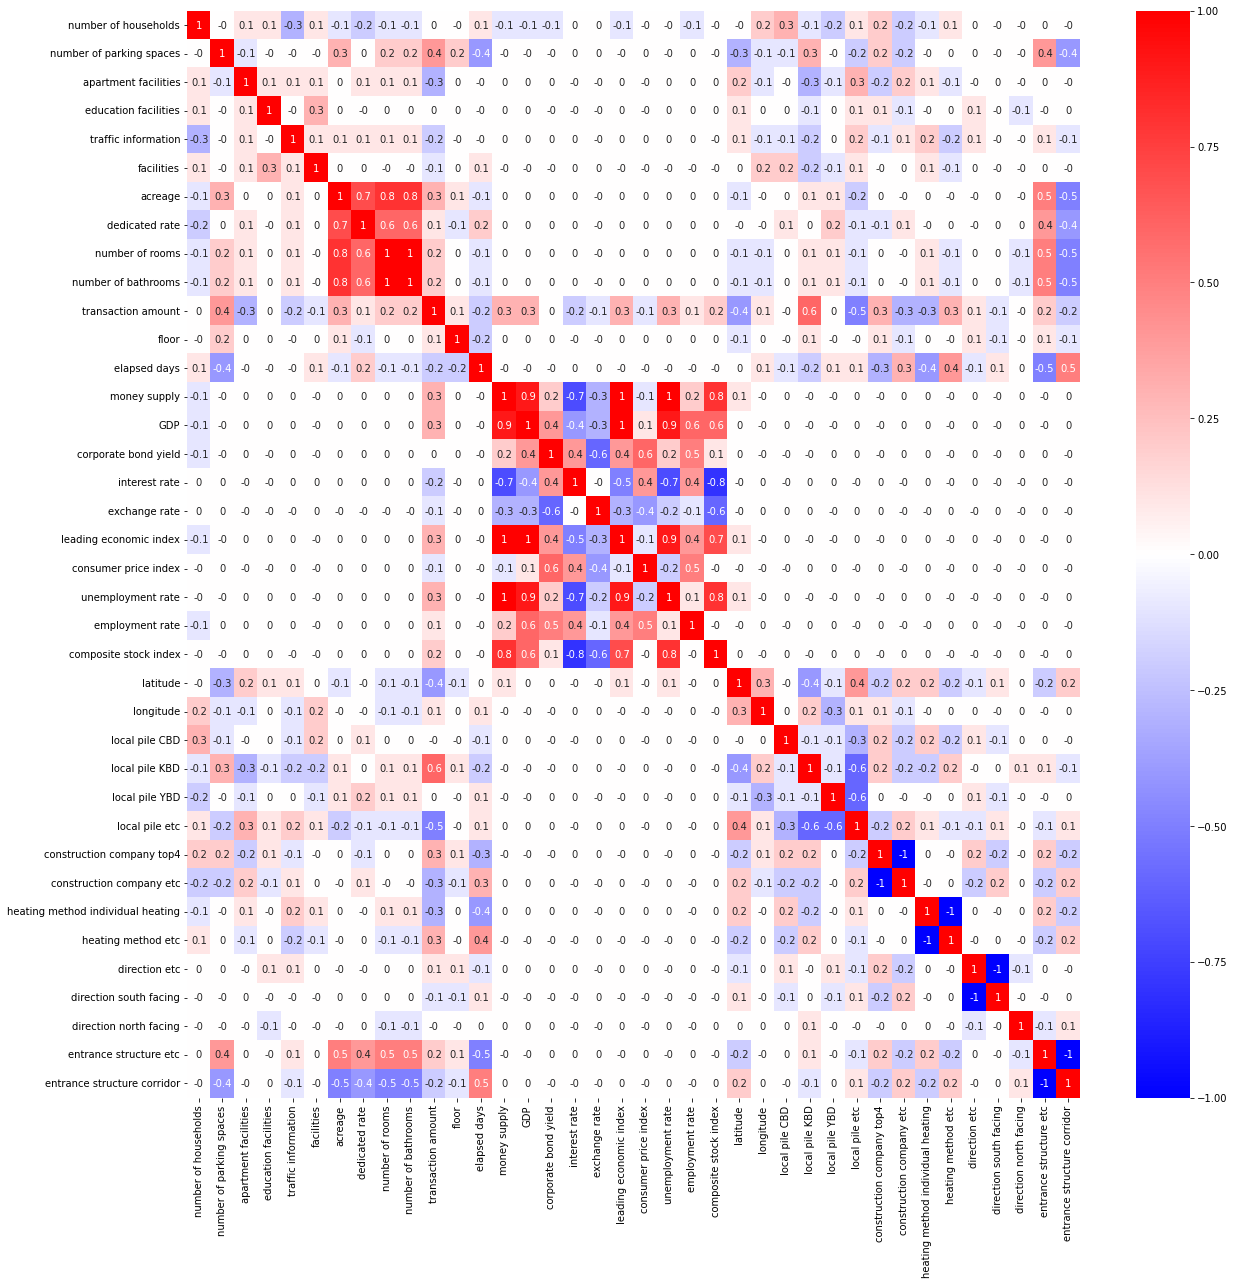

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
correlation_matrix=merge_all_eng.corr().round(1)
sns.heatmap(data=correlation_matrix,annot=True,cmap='bwr')


# 모델별 성능 확인을 위한 함수

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name

    my_name = name_
    my_pred = pred
    my_actual = actual

    plot_predictions(name_, actual, pred)

    mse = mean_squared_error(actual,pred)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df) / 2

    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')

    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)

    plt.show()
    print("r2_score: ",r2_score(actual,pred))
    print("mean_squared_error: ",mean_squared_error(actual,pred))
    print("mean_absolute_error: ",mean_absolute_error(actual,pred))
    print("RMSE: ", np.sqrt(mean_squared_error(actual,pred)))

def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual

    mse = mean_squared_error(actual,pred)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name

    plot_predictions(my_name, my_pred, my_actual)

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df) / 2

    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')

    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)

    plt.show()

# 다중공선성 확인

## merge_all_eng_scaled -> df로 복제

In [ ]:
df = merge_all_eng_scaled.copy(deep=True)

In [ ]:
df

## 다중공선성 확인

In [ ]:
import statsmodels.api as sm
df = sm.add_constant(df, has_constant='add')
df

In [ ]:
# from sklearn.model_selection import train_test_split
# y= df['transaction amount']
# X = df.drop(['transaction amount'],axis=1)
# feature_columns = X.columns
# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

In [ ]:
# full_model = sm.OLS(y,X)
# fitted_full_model = full_model.fit()
# fitted_full_model.summary()

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# vif_factor=[]
# for i in range(43):
#   try:
#     vif_factor.append(variance_inflation_factor(X.values, i))
#   except:
#     print(i)
#     pass
# vif_feature=X.columns

In [ ]:
# vif = pd.DataFrame([vif_feature,vif_factor])
# vif = vif.transpose()
# vif.columns = ['feature','vif factor']
# vif

In [ ]:
df.drop(['number of bathrooms','GDP','corporate bond yield','local pile CBD','local pile KBD','local pile YBD','local pile etc','construction company etc','money supply','contract time','heating method etc','exchange rate','direction etc','entrance structure etc','leading economic index','consumer price index','composite stock index','unemployment rate'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
y= df['transaction amount']
X = df.drop(['transaction amount'],axis=1)
feature_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
vif_factor=[]
for i in range(len(X.columns)):
  try:
    vif_factor.append(variance_inflation_factor(X.values, i))
  except:
    print(i)
    pass
vif_feature=X.columns
vif = pd.DataFrame([vif_feature,vif_factor])
vif = vif.transpose()
vif.columns = ['feature','vif factor']
vif

In [ ]:
full_model = sm.OLS(y,X)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

In [ ]:
len(X.columns)

# PCA 모델 학습

## df -> pca_df로 복제

In [ ]:
pca_df = df.copy(deep=True)

In [ ]:
pca_df.drop(['const'],axis=1,inplace=True)

In [ ]:
pca_df

## PCA

In [ ]:
from sklearn.decomposition import PCA
#x,y값 결정
x=pca_df.drop(['transaction amount'],axis=1)
pca = PCA(n_components=20) # 주성분을 몇개로 할지 결정
principalComponents = pca.fit(x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
#x,y값 결정
x=pca_df.drop(['transaction amount'],axis=1)
pca = PCA(n_components=14) # 주성분을 몇개로 할지 결정
principalComponents = pca.fit_transform(x)
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

## xgboost

In [ ]:
pip install xgboost

In [ ]:
x=principalComponents

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np


#x,y값 결정
x=principalComponents
y=pca_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
#XG 라비브러리 사용 -> 학습률 0.08, subsample 0.75
#r : 클수록 변화율 낮춰줌,
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

In [ ]:
#변수의 중요도를 구해주는 함수
xgboost.plot_importance(xgb_model)

In [ ]:
# 최상의 weight값이 몇이냐?
predictions = xgb_model.predict(X_test)
predictions

In [ ]:
#R2 score 구해라 (1일수록 좋은거)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_test,predictions))

In [ ]:
xgb_model.score(X_test, y_test)

In [ ]:
pred = xgb_model.predict(X_test)
mse_eval('XG Boost', y_test, pred)

## catboost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from catboost import CatBoostRegressor, Pool
# Initialize data
x=principalComponents
y=pca_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=1,
                          depth=7)
# Fit model
model.fit(X_train,y_train)
# Get predictions
r_sq = model.score(X_train, y_train)
print(r_sq)
model.score(X_test, y_test)

In [ ]:
pred = model.predict(X_test)
mse_eval('Cat Boost', y_test, pred)

## Linear Regression

In [ ]:
x=principalComponents
y=pca_df['transaction amount']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_eval('Linear Regression', y_test, pred)

# 전진선택법 모델 학습

## df -> front_df로 복제

In [ ]:
front_df = df.copy(deep=True)

In [ ]:
front_df.drop(['const'],axis=1,inplace=True)

In [ ]:
front_df

,number of households,number of parking spaces,apartment facilities,education facilities,traffic information,facilities,acreage,dedicated rate,number of rooms,transaction amount,floor,elapsed days,interest rate,employment rate,latitude,longitude,construction company top4,heating method individual heating,direction south facing,direction north facing,entrance structure corridor
0,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014214,0.125000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
1,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.006926,0.250000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
2,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.012410,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
3,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.024531,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
4,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014286,0.166667,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878923,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.050505,0.125000,0.38,0.555556,0.222222,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878924,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.069986,0.111111,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878925,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.055123,0.166667,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878926,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.072150,0.083333,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0


## 전진선택법

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## 전진 선택법
variables = front_df.drop(['transaction amount'],axis=1) ## 설명 변수 리스트
y= front_df['transaction amount']
selected_variables = [] ## 선택된 변수들
sl_enter = 0.0001

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = front_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(front_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


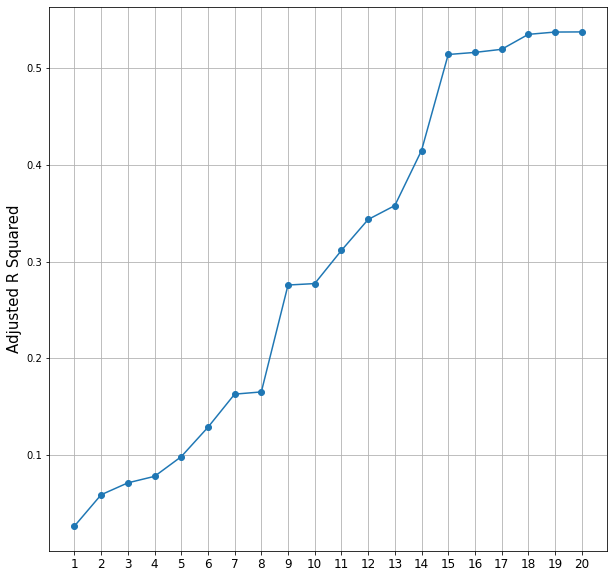

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps, fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

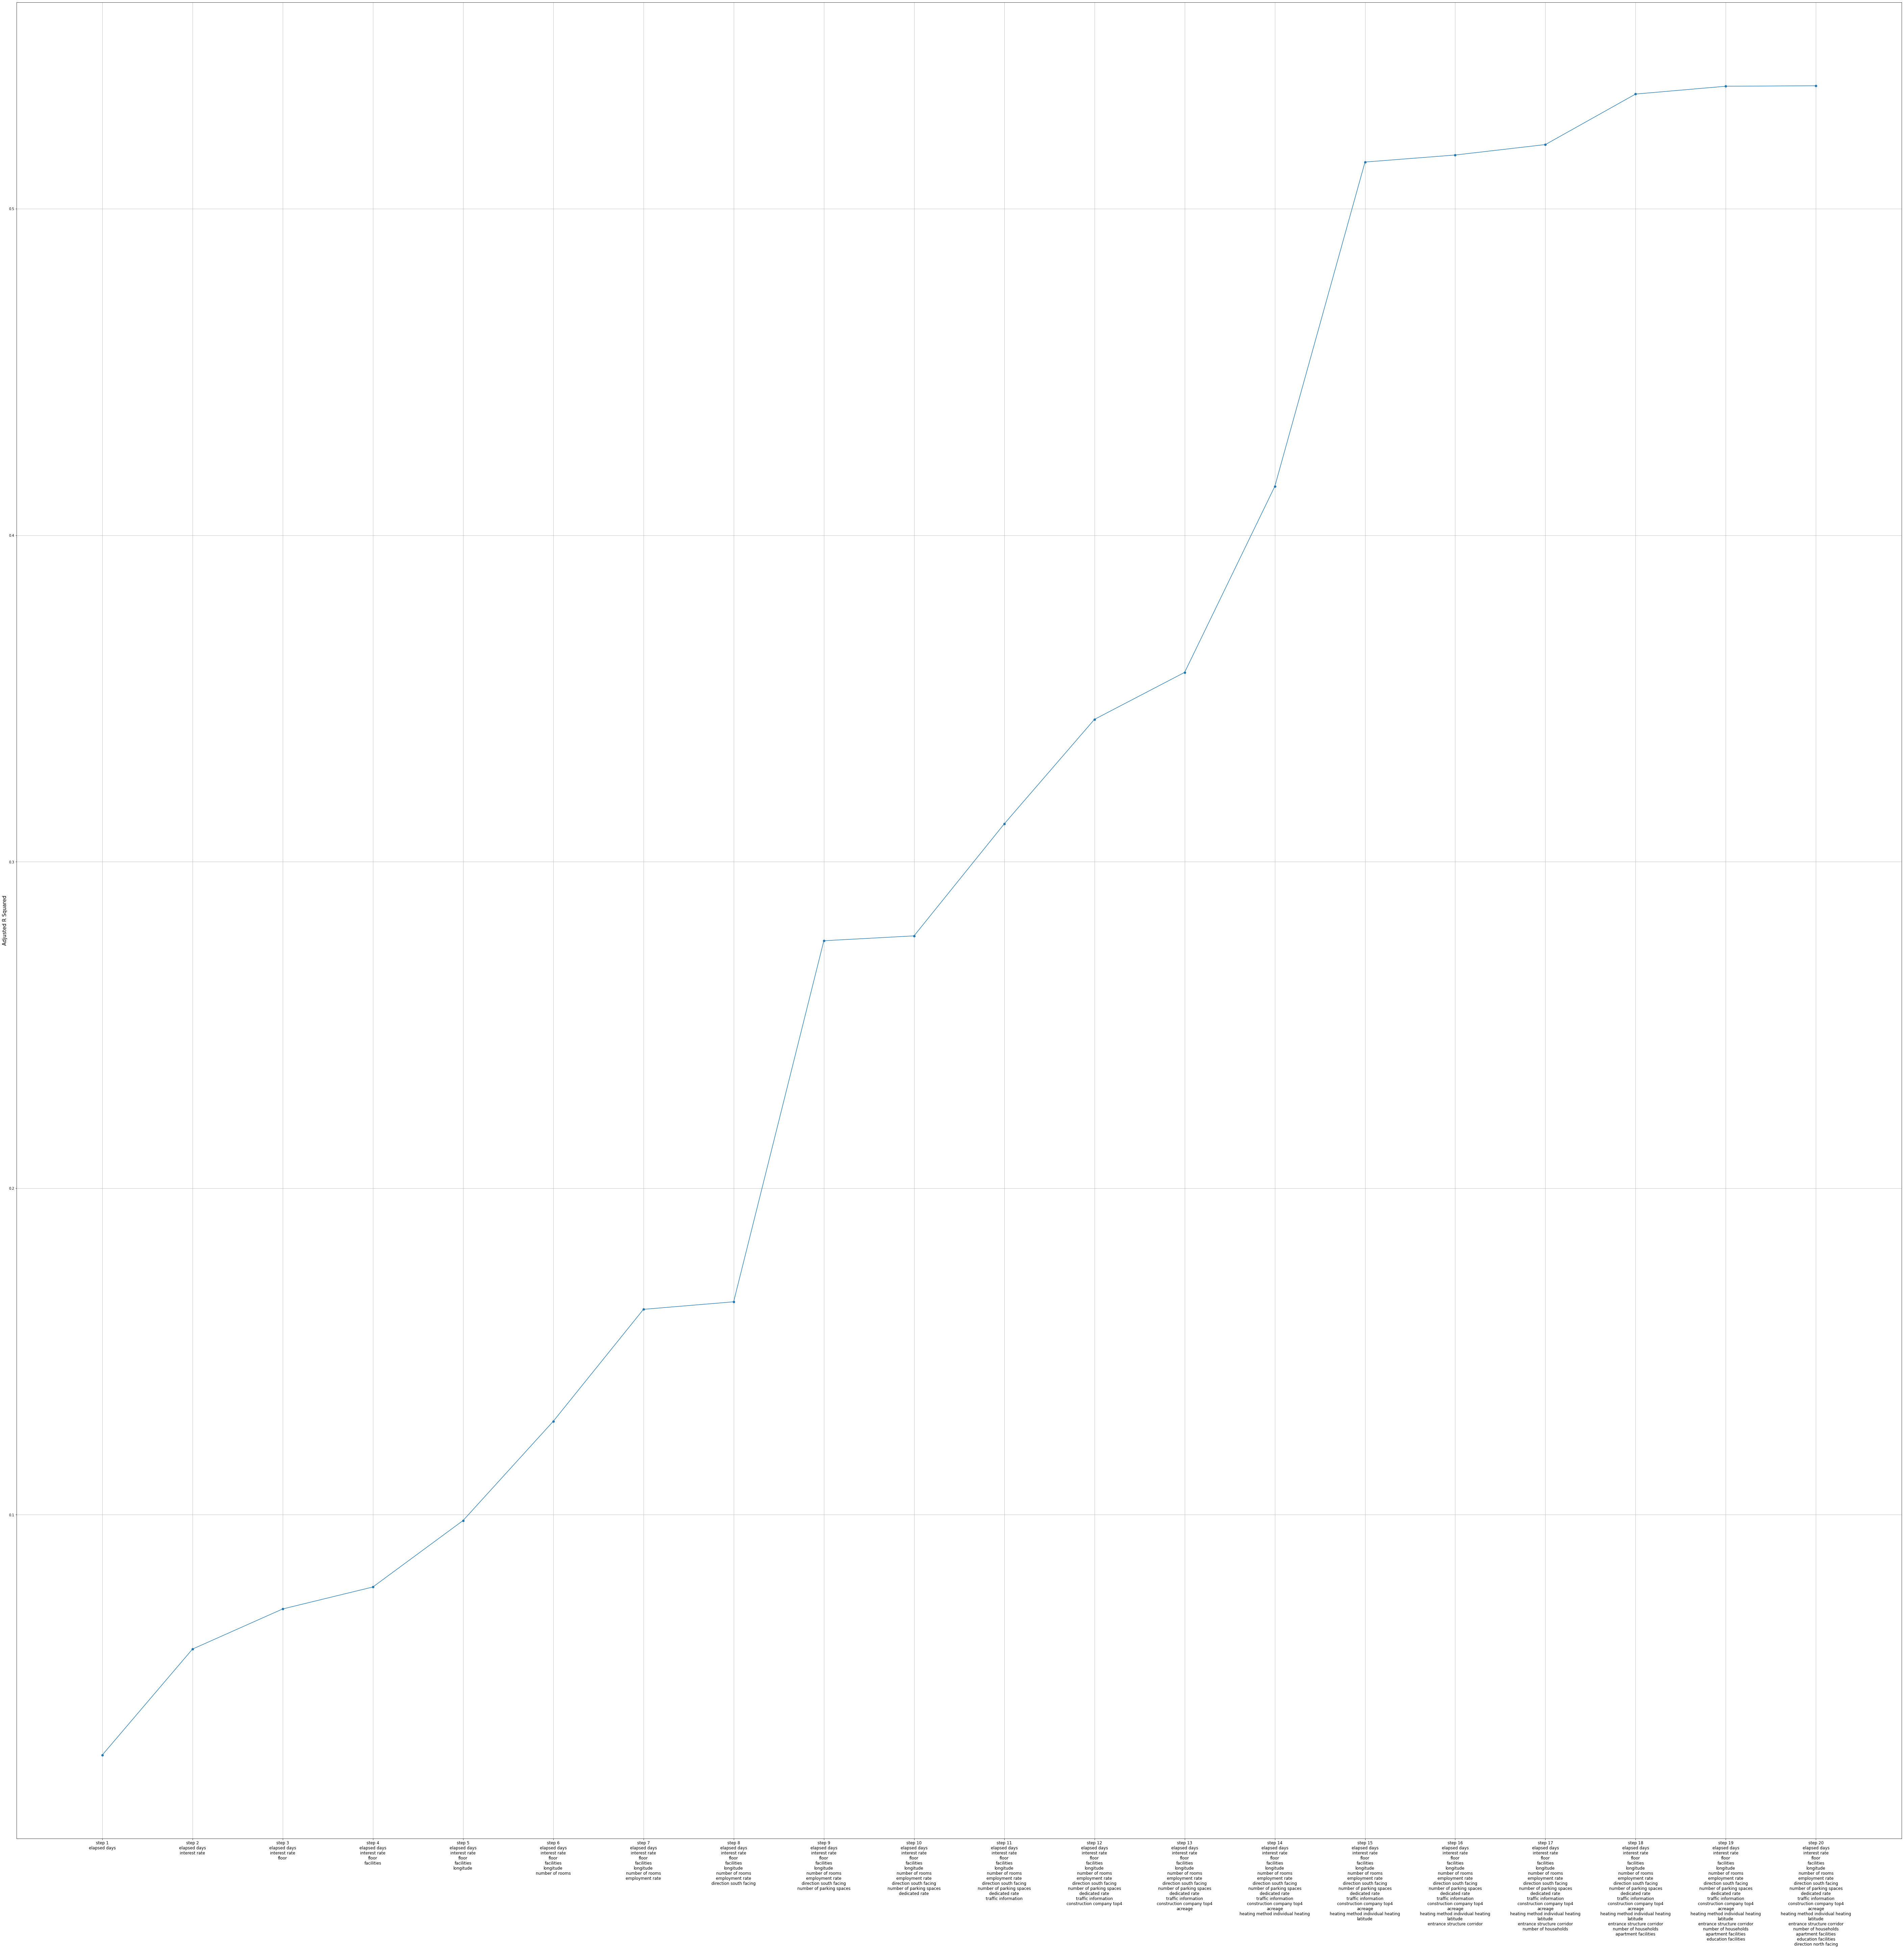

In [ ]:
fig = plt.figure(figsize=(100,100))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
#step 19
a = ['number of rooms',
 'latitude',
 'direction south facing',
 'employment rate',
 'construction company top4',
 'floor',
 'traffic information',
 'number of parking spaces',
 'entrance structure corridor',
 'interest rate',
 'facilities',
 'longitude',
 'education facilities',
 'number of households',
 'apartment facilities',
 'elapsed days',
 'dedicated rate',
 'acreage',
 'heating method individual heating','transaction amount']
print(len(a))

20


In [ ]:
for i in front_df.columns:
  if i in a:
    continue
  else:
    front_df.drop(i,axis = 1,inplace=True)

In [ ]:
len(front_df.columns)

20

In [ ]:
selected_variables

['elapsed days',
 'interest rate',
 'floor',
 'facilities',
 'longitude',
 'number of rooms',
 'employment rate',
 'direction south facing',
 'number of parking spaces',
 'dedicated rate',
 'traffic information',
 'construction company top4',
 'acreage',
 'heating method individual heating',
 'latitude',
 'entrance structure corridor',
 'number of households',
 'apartment facilities',
 'education facilities',
 'direction north facing']

In [ ]:
len(selected_variables)

20

## xgboost hyperparameter

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cgb
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warning

ModuleNotFoundError: ignored

In [ ]:
#x,y값 결정
X=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']

dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values)

# Define Objective Function
def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight, gamma ):
    params = {
    'n_estimators': 300,
    'eta': 0.05,
    'objective': 'reg:linear',
    'eval_metric':'mae', # Optional --> Use eval_metric if you want to stop evaluation based on eval_metric
    'silent': 1
     }
    params['max_depth'] = int(round(max_depth))
    params['subsample'] = max(min(subsample, 1), 0)
    params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['min_child_weight'] = int(min_child_weight)
    params['gamma'] = max(gamma, 0)
    scores = xgb.cv(params, dtrain, num_boost_round=1000,verbose_eval=False, early_stopping_rounds=10, feval=xgb_r2, maximize=True, nfold=5)
    return  scores['test-mae-mean'].iloc[-1]

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7),
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})

xgb_bo.maximize(init_points=5, n_iter=5, acq='ei')

In [ ]:
from sklearn.model_selection import GridSearchCV


#x,y값 결정
x=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)


# XGBoost 분류기 생성
model = xgb.XGBRegressor()

# 초모수 격자생성
xgb_param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=model,
                       param_grid=xgb_param_grid,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1,
                       cv=5,
                       refit=True,
                       return_train_score=True, verbose = 1)

hr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: ignored

In [ ]:
hr_grid_df = pd.DataFrame(hr_grid.cv_results_)
hr_grid_df.loc[:, ['mean_test_score', "params"]]

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data,
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)

    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)

    return fitted_model, pred

In [ ]:
#x,y값 결정
x=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model,
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: ignored

## xgboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np

#x,y값 결정
x=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
#XG 라비브러리 사용 -> 학습률 0.08, subsample 0.75
#r : 클수록 변화율 낮춰줌,
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

615249 263679
[05:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

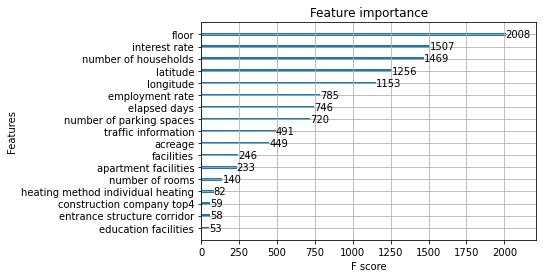

In [ ]:
#변수의 중요도를 구해주는 함수
xgboost.plot_importance(xgb_model)

In [ ]:
# 최상의 weight값이 몇이냐?
predictions = xgb_model.predict(X_test)
predictions

array([0.08651695, 0.08039558, 0.27045792, ..., 0.02593729, 0.18044609,
       0.08510938], dtype=float32)

In [ ]:
#R2 score 구해라 (1일수록 좋은거)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_test,predictions))

0.8885420480230007
0.8862553324237922


In [ ]:
xgb_model.score(X_test, y_test)

0.8862541031119697

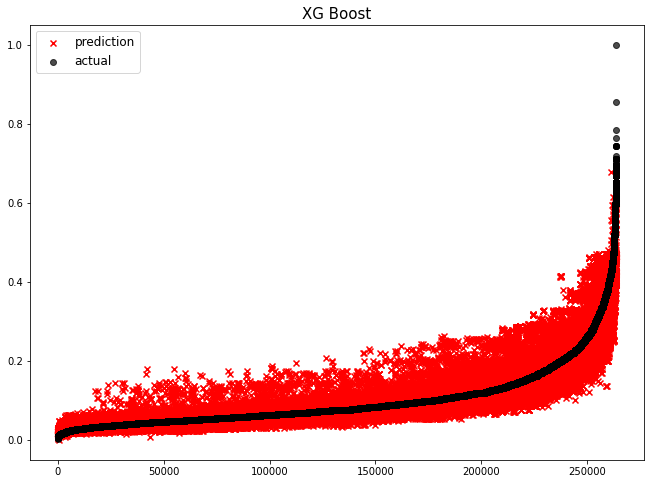

               model       mse
0  Linear Regression  0.003018
1          Cat Boost  0.000733
2           XG Boost  0.000715


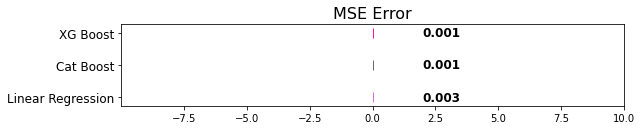

r2_score:  0.8690997493456319
mean_squared_error:  0.000715058163450517
mean_absolute_error:  0.01604003689661764
RMSE:  0.026740571486984287


In [ ]:
pred = xgb_model.predict(X_test)
mse_eval('XG Boost', y_test, pred)

## catboost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostRegressor, Pool
# Initialize data
x=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=1,
                          depth=7)
# Fit model
model.fit(X_train,y_train)
# Get predictions
r_sq = model.score(X_train, y_train)
print(r_sq)
model.score(X_test, y_test)

0:	learn: 0.0425328	total: 147ms	remaining: 1m 13s
1:	learn: 0.0374219	total: 239ms	remaining: 59.5s
2:	learn: 0.0351077	total: 326ms	remaining: 54.1s
3:	learn: 0.0333807	total: 438ms	remaining: 54.3s
4:	learn: 0.0319479	total: 539ms	remaining: 53.3s
5:	learn: 0.0313673	total: 622ms	remaining: 51.2s
6:	learn: 0.0306150	total: 726ms	remaining: 51.2s
7:	learn: 0.0301130	total: 830ms	remaining: 51s
8:	learn: 0.0295838	total: 943ms	remaining: 51.5s
9:	learn: 0.0294017	total: 1.04s	remaining: 51.1s
10:	learn: 0.0292359	total: 1.14s	remaining: 50.5s
11:	learn: 0.0290242	total: 1.23s	remaining: 50.2s
12:	learn: 0.0288092	total: 1.34s	remaining: 50.4s
13:	learn: 0.0286703	total: 1.45s	remaining: 50.4s
14:	learn: 0.0285595	total: 1.54s	remaining: 50s
15:	learn: 0.0284255	total: 1.63s	remaining: 49.4s
16:	learn: 0.0282752	total: 1.74s	remaining: 49.3s
17:	learn: 0.0281807	total: 1.83s	remaining: 49s
18:	learn: 0.0281236	total: 1.91s	remaining: 48.3s
19:	learn: 0.0280665	total: 2.01s	remaining: 4

0.8986337684625725

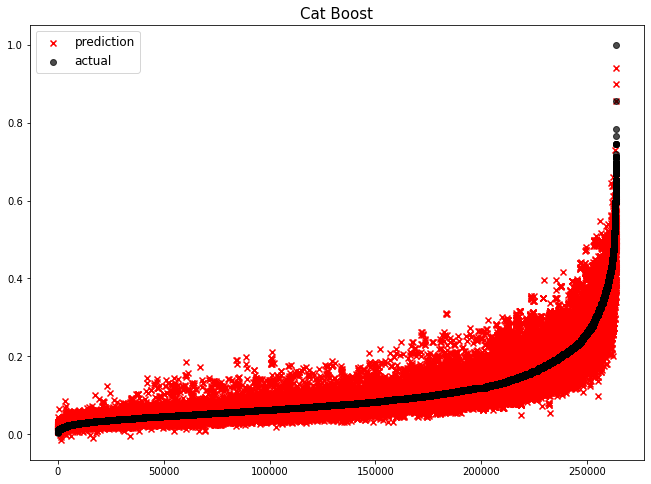

               model       mse
0  Linear Regression  0.003018
1           XG Boost  0.000715
2          Cat Boost  0.000637


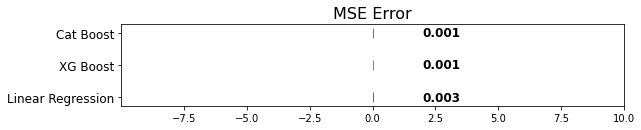

r2_score:  0.8882347379977099
mean_squared_error:  0.0006372339868259487
mean_absolute_error:  0.015055176732001546
RMSE:  0.025243493950440947


In [ ]:
pred = model.predict(X_test)
mse_eval('Cat Boost',  y_test, pred)

## Linear Regression

In [ ]:
x=front_df.drop(['transaction amount'],axis=1)
y=front_df['transaction amount']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

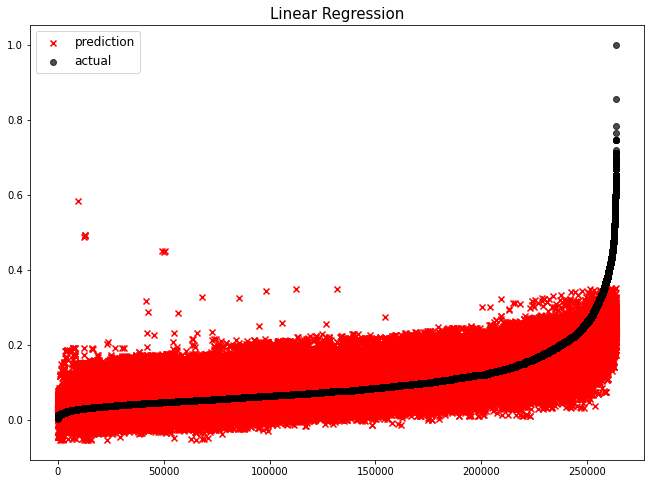

               model       mse
0  Linear Regression  0.002914
1           XG Boost  0.000715
2          Cat Boost  0.000637


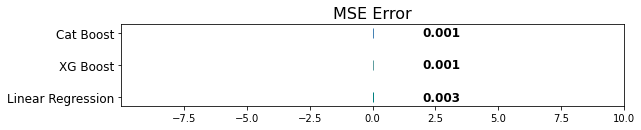

r2_score:  0.13202862204658328
mean_squared_error:  0.0029141719528564306
mean_absolute_error:  0.037006054096619403
RMSE:  0.053983070983933755


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_eval('Linear Regression', y_test, pred)

# 후진선택법 모델 학습

## df -> back_df로 복제

In [ ]:
back_df = df.copy(deep=True)

In [ ]:
back_df.drop(['const'],axis=1,inplace=True)

In [ ]:
back_df

,number of households,number of parking spaces,apartment facilities,education facilities,traffic information,facilities,acreage,dedicated rate,number of rooms,transaction amount,floor,elapsed days,interest rate,employment rate,latitude,longitude,construction company top4,heating method individual heating,direction south facing,direction north facing,entrance structure corridor
0,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014214,0.125000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
1,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.006926,0.250000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
2,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.012410,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
3,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.024531,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
4,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014286,0.166667,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878923,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.050505,0.125000,0.38,0.555556,0.222222,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878924,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.069986,0.111111,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878925,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.055123,0.166667,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878926,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.072150,0.083333,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0


##후진선택법

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
variables =  back_df.drop(['transaction amount'],axis=1).columns.tolist()
y= back_df['transaction amount']

In [ ]:
## 후진 소거법

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.0001

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

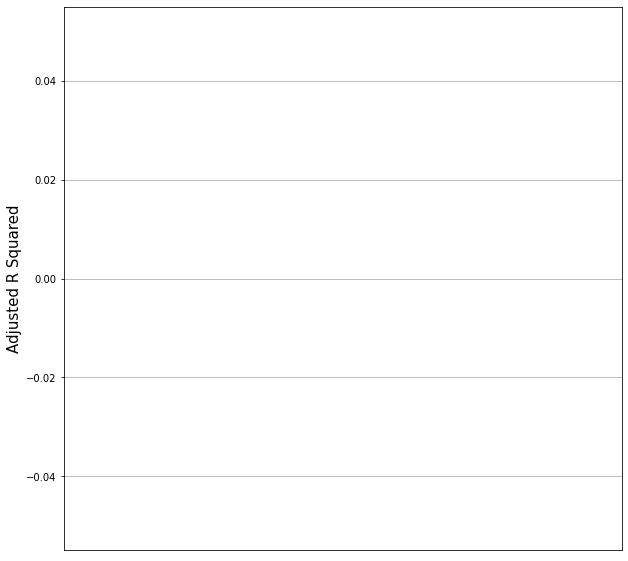

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps, fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
len(selected_variables)

20

## xgboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np

#x,y값 결정
x=back_df.drop(['transaction amount'],axis=1)
y=back_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
#XG 라비브러리 사용 -> 학습률 0.08, subsample 0.75
#r : 클수록 변화율 낮춰줌,
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

615249 263679
[05:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

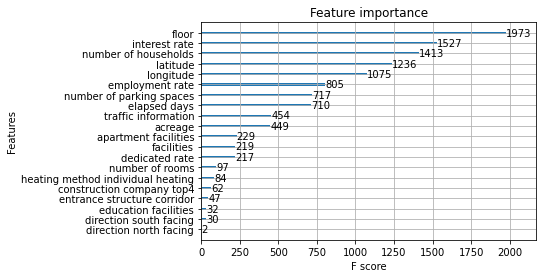

In [ ]:
#변수의 중요도를 구해주는 함수
xgboost.plot_importance(xgb_model)

In [ ]:
# 최상의 weight값이 몇이냐?
predictions = xgb_model.predict(X_test)
predictions

array([0.08360398, 0.08001083, 0.27037174, ..., 0.02590945, 0.17491892,
       0.08248809], dtype=float32)

In [ ]:
#R2 score 구해라 (1일수록 좋은거)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_test,predictions))

0.8883941218869523
0.8861370340046733


In [ ]:
xgb_model.score(X_test, y_test)

0.8861360519635608

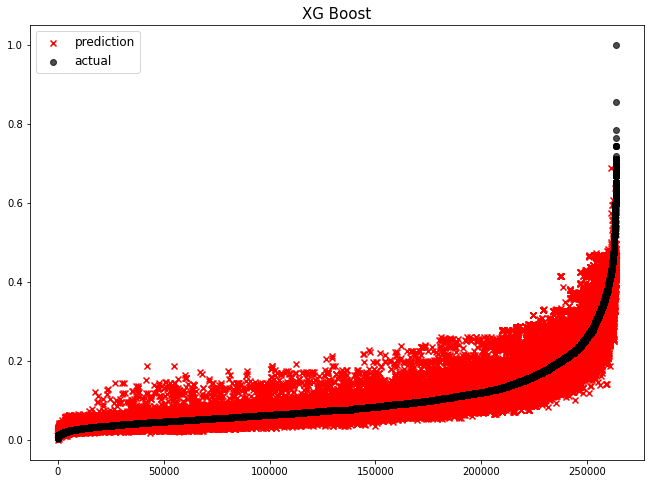

               model       mse
0  Linear Regression  0.002914
1           XG Boost  0.000716
2          Cat Boost  0.000637


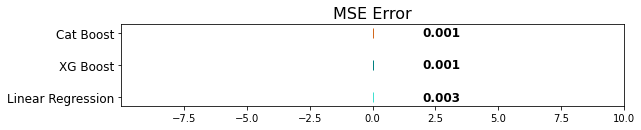

r2_score:  0.8688428496545113
mean_squared_error:  0.0007158002863726088
mean_absolute_error:  0.01602951536100806
RMSE:  0.02675444423591357


In [ ]:
pred = xgb_model.predict(X_test)
mse_eval('XG Boost', y_test, pred)

## catboost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostRegressor, Pool
# Initialize data
x=back_df.drop(['transaction amount'],axis=1)
y=back_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=1,
                          depth=7)
# Fit model
model.fit(X_train,y_train)
# Get predictions
r_sq = model.score(X_train, y_train)
print(r_sq)
model.score(X_test, y_test)

0:	learn: 0.0438458	total: 107ms	remaining: 53.4s
1:	learn: 0.0376272	total: 206ms	remaining: 51.4s
2:	learn: 0.0356518	total: 297ms	remaining: 49.2s
3:	learn: 0.0342524	total: 386ms	remaining: 47.8s
4:	learn: 0.0330914	total: 480ms	remaining: 47.6s
5:	learn: 0.0325912	total: 567ms	remaining: 46.7s
6:	learn: 0.0318602	total: 657ms	remaining: 46.3s
7:	learn: 0.0312334	total: 777ms	remaining: 47.8s
8:	learn: 0.0307862	total: 888ms	remaining: 48.5s
9:	learn: 0.0303994	total: 1.01s	remaining: 49.4s
10:	learn: 0.0300622	total: 1.11s	remaining: 49.2s
11:	learn: 0.0298463	total: 1.2s	remaining: 49s
12:	learn: 0.0296579	total: 1.3s	remaining: 48.6s
13:	learn: 0.0294070	total: 1.39s	remaining: 48.3s
14:	learn: 0.0292253	total: 1.51s	remaining: 48.7s
15:	learn: 0.0289883	total: 1.63s	remaining: 49.2s
16:	learn: 0.0288658	total: 1.72s	remaining: 48.9s
17:	learn: 0.0287594	total: 1.81s	remaining: 48.6s
18:	learn: 0.0286280	total: 1.93s	remaining: 48.9s
19:	learn: 0.0285527	total: 2.02s	remaining: 

0.8982968562130922

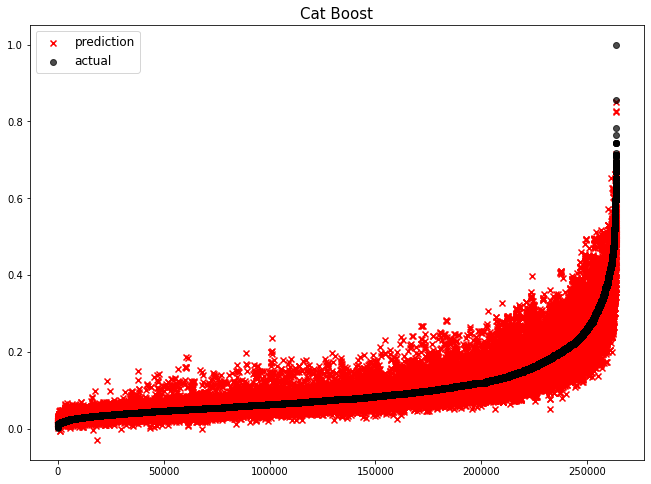

               model       mse
0  Linear Regression  0.002914
1           XG Boost  0.000716
2          Cat Boost  0.000639


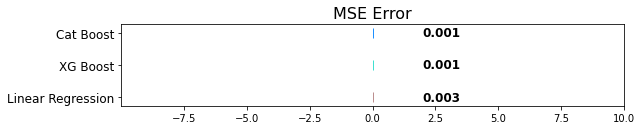

r2_score:  0.8877410352458434
mean_squared_error:  0.000639351969636305
mean_absolute_error:  0.01507915810646956
RMSE:  0.02528541021293317


In [ ]:
pred = model.predict(X_test)
mse_eval('Cat Boost', y_test, pred)

## Linear Regression

In [ ]:
x=back_df.drop(['transaction amount'],axis=1)
y=back_df['transaction amount']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

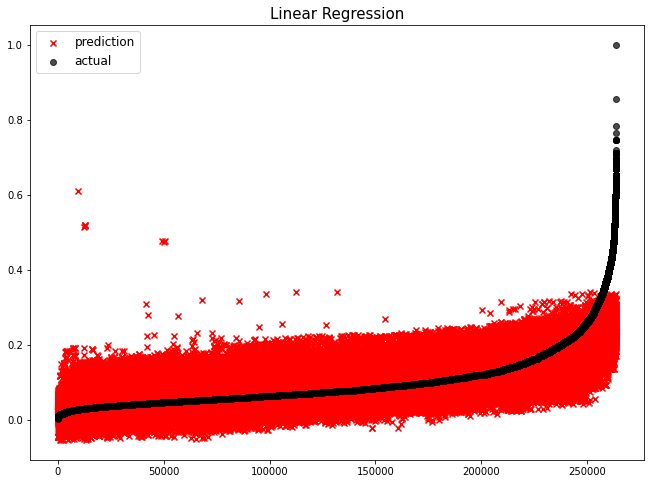

               model       mse
0  Linear Regression  0.002900
1           XG Boost  0.000716
2          Cat Boost  0.000639


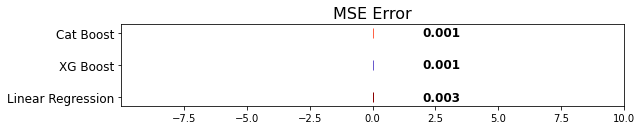

r2_score:  0.139926107111216
mean_squared_error:  0.002899867842044469
mean_absolute_error:  0.03691831737292776
RMSE:  0.053850421001552705


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_eval('Linear Regression',  y_test, pred)

# 전진 단계별 선택법 모델 학습

## df -> step_df로 복제

In [ ]:
step_df = df.copy(deep=True)

In [ ]:
step_df.drop(['const'],axis=1,inplace=True)

In [ ]:
step_df

,number of households,number of parking spaces,apartment facilities,education facilities,traffic information,facilities,acreage,dedicated rate,number of rooms,transaction amount,floor,elapsed days,interest rate,employment rate,latitude,longitude,construction company top4,heating method individual heating,direction south facing,direction north facing,entrance structure corridor
0,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014214,0.125000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
1,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.006926,0.250000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
2,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.012410,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
3,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.024531,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
4,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014286,0.166667,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878923,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.050505,0.125000,0.38,0.555556,0.222222,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878924,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.069986,0.111111,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878925,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.055123,0.166667,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878926,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.072150,0.083333,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0


## stepwise selecton

In [ ]:
## 전진 단계별 선택법
variables = step_df.drop(['transaction amount'],axis=1) ## 설명 변수 리스트
y = step_df['transaction amount'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.0001
sl_remove = 0.0001

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = step_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = step_df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(step_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


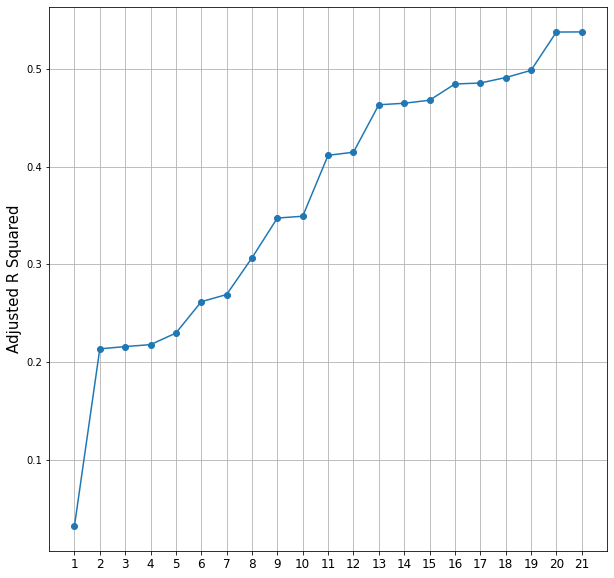

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps, fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

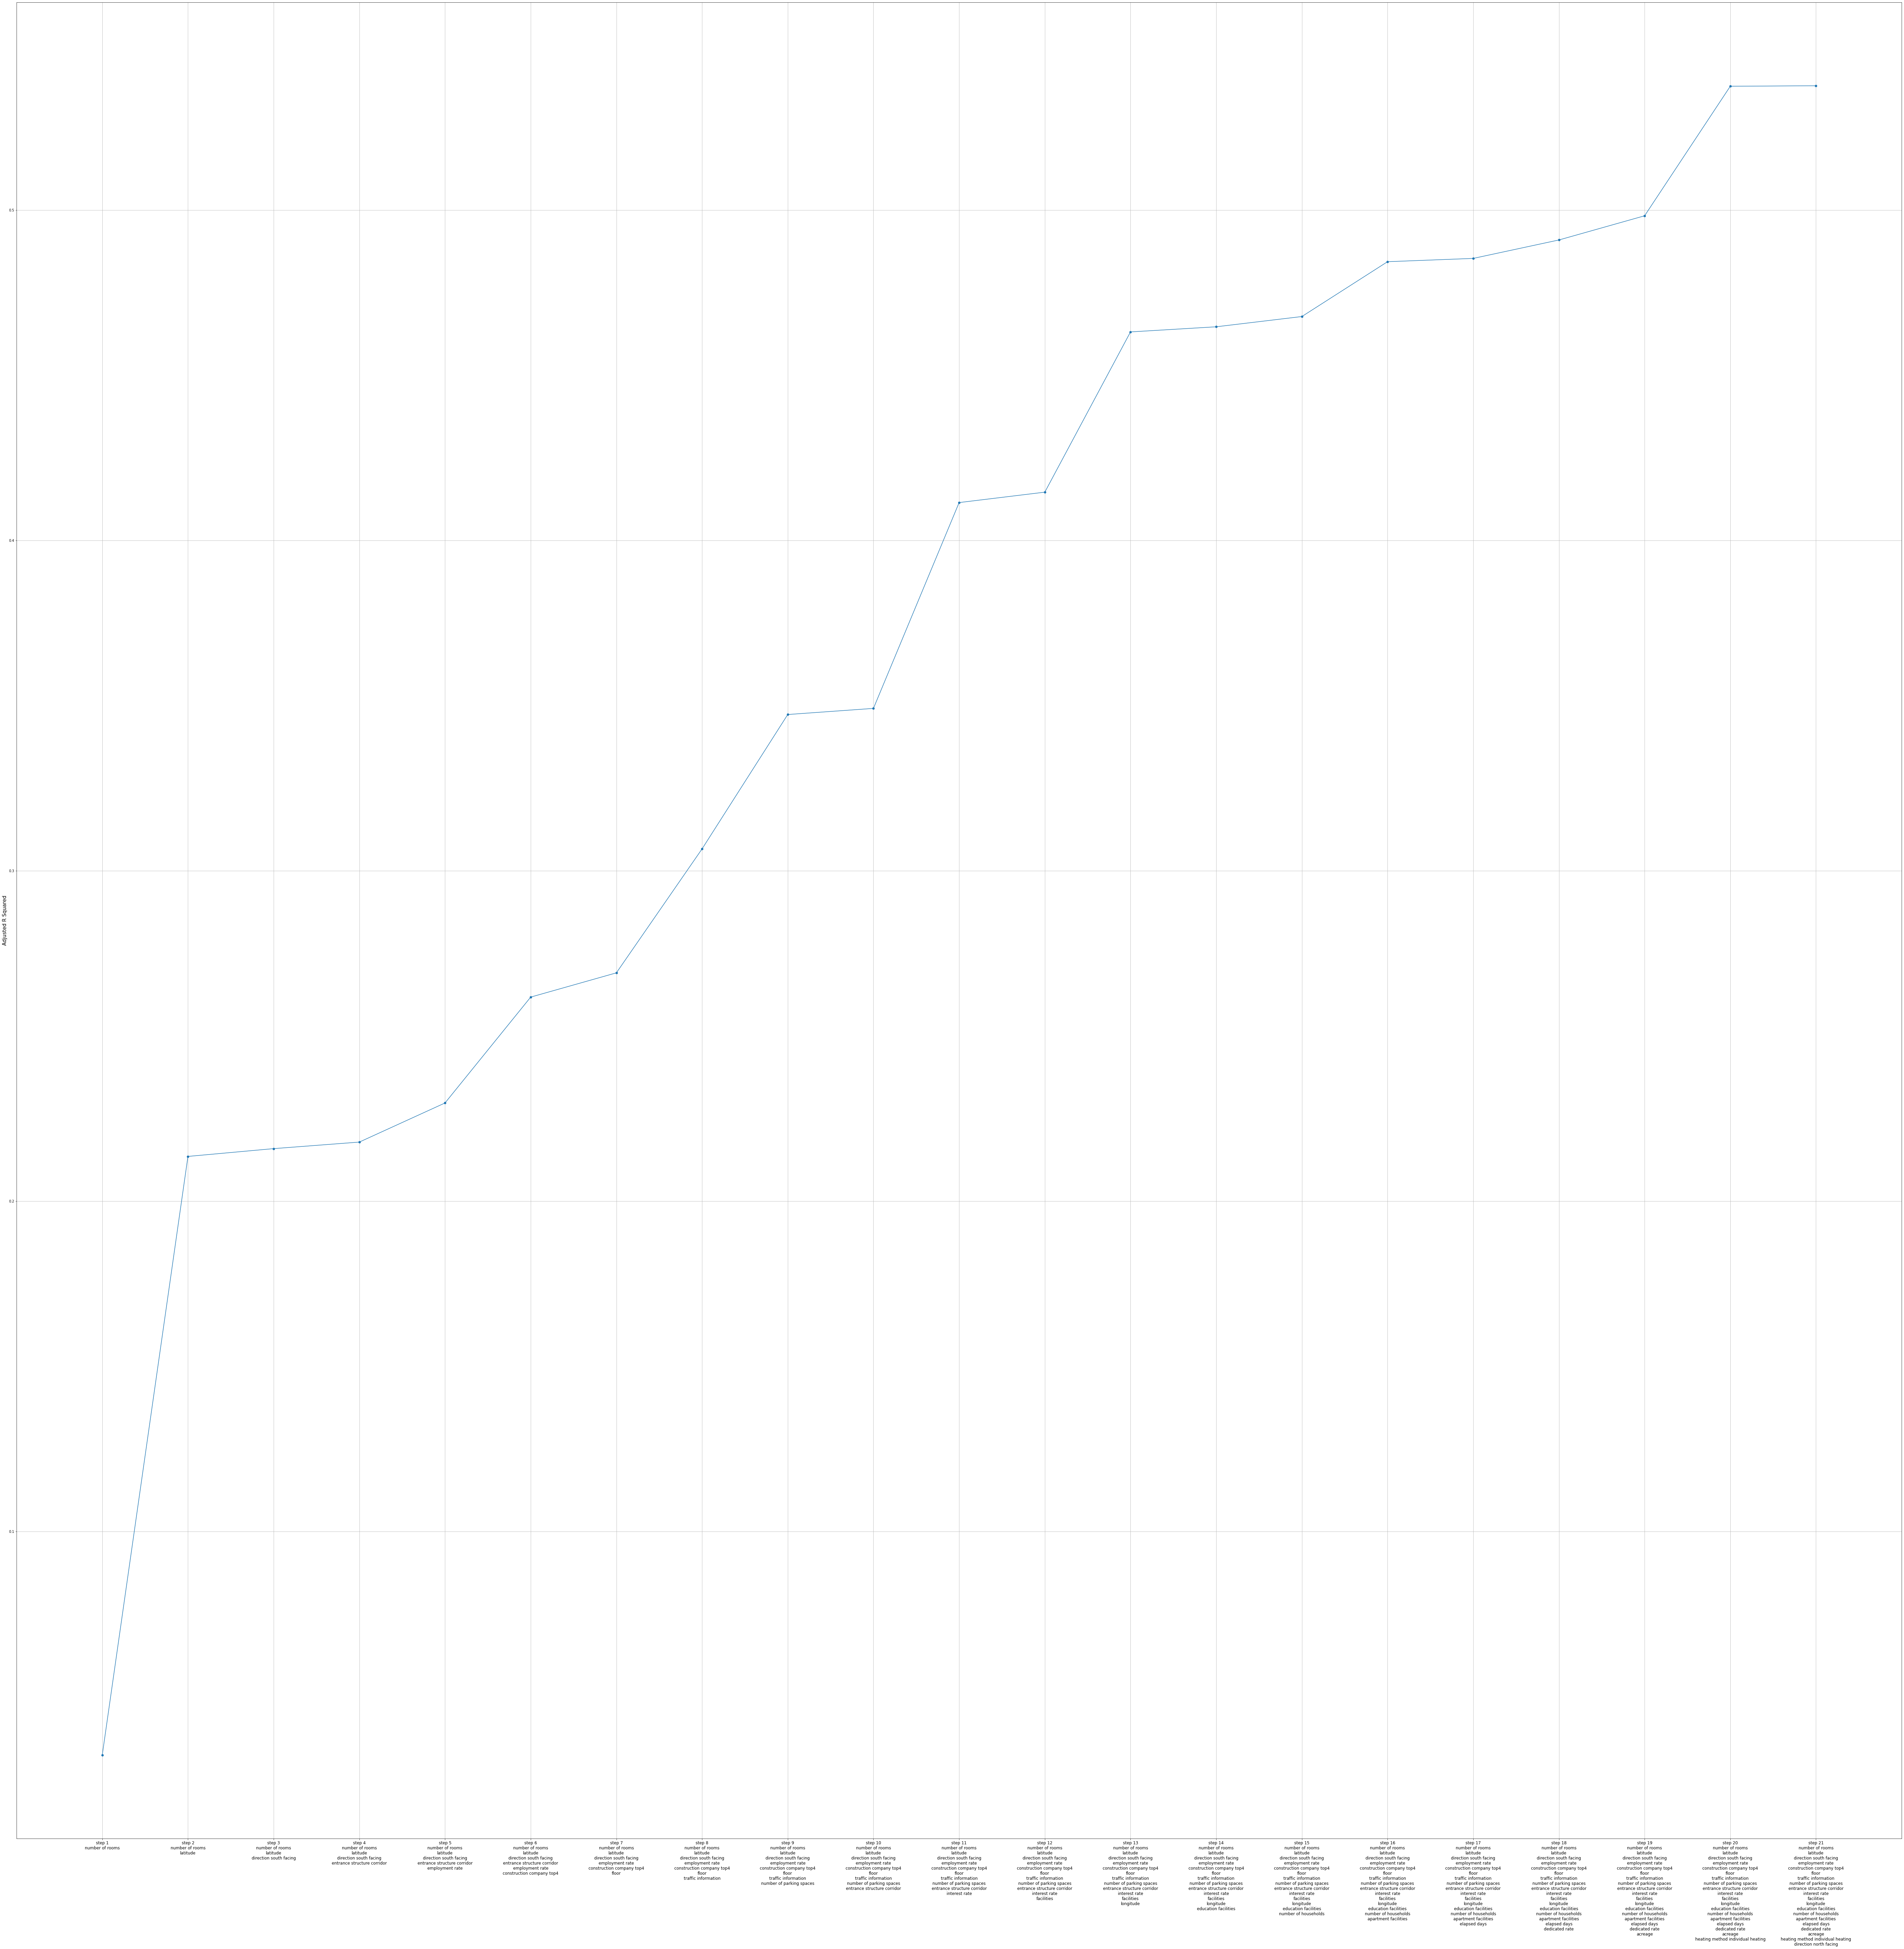

In [ ]:
fig = plt.figure(figsize=(100,100))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
#step 18
c=['number of rooms',
 'latitude',
 'direction south facing',
 'employment rate',
 'construction company top4',
 'floor',
 'traffic information',
 'number of parking spaces',
 'entrance structure corridor',
 'interest rate',
 'facilities',
 'longitude',
 'education facilities',
 'number of households',
 'apartment facilities',
 'elapsed days',
 'dedicated rate',
 'acreage',
 'heating method individual heating','transaction amount']

print(len(c))

17


In [ ]:
for i in step_df.columns:
  if i in c:
    continue
  else:
    step_df.drop(i,axis = 1,inplace=True)

In [ ]:
len(step_df.columns)

17

In [ ]:
selected_variables

['number of rooms',
 'latitude',
 'direction south facing',
 'employment rate',
 'construction company top4',
 'floor',
 'traffic information',
 'number of parking spaces',
 'entrance structure corridor',
 'interest rate',
 'facilities',
 'longitude',
 'education facilities',
 'number of households',
 'apartment facilities',
 'elapsed days',
 'dedicated rate',
 'acreage',
 'heating method individual heating',
 'direction north facing']

In [ ]:
len(selected_variables)

20

## xgboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np

#x,y값 결정
x=step_df.drop(['transaction amount'],axis=1)
y=step_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
#XG 라비브러리 사용 -> 학습률 0.08, subsample 0.75
#r : 클수록 변화율 낮춰줌,
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

615249 263679
[05:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

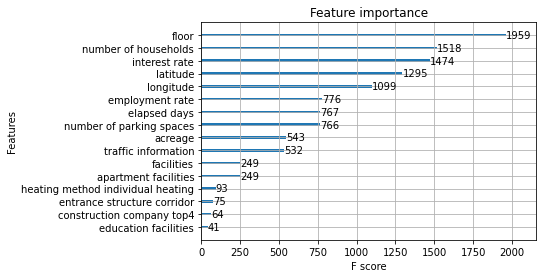

In [ ]:
#변수의 중요도를 구해주는 함수
xgboost.plot_importance(xgb_model)

In [ ]:
# 최상의 weight값이 몇이냐?
predictions = xgb_model.predict(X_test)
predictions

array([0.08009037, 0.08452091, 0.26908413, ..., 0.02642086, 0.18155476,
       0.08315426], dtype=float32)

In [ ]:
#R2 score 구해라 (1일수록 좋은거)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_test,predictions))

0.8881816817639813
0.8858943462999376


In [ ]:
xgb_model.score(X_test, y_test)

0.8858931769108409

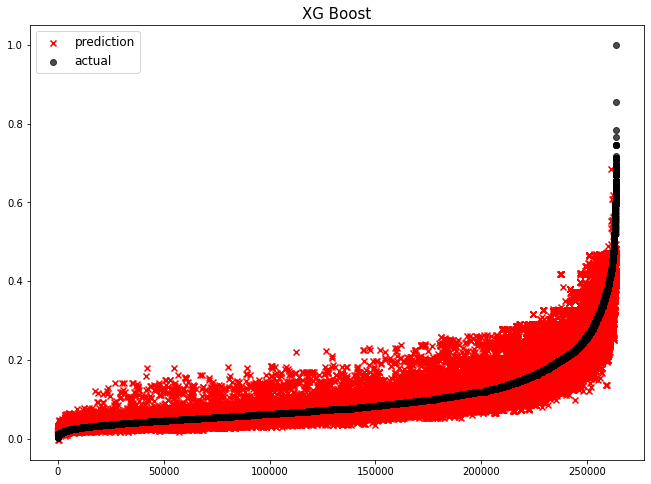

               model       mse
0  Linear Regression  0.002900
1           XG Boost  0.000717
2          Cat Boost  0.000639


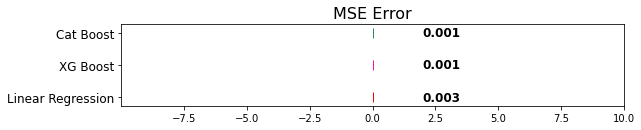

r2_score:  0.8686135109745046
mean_squared_error:  0.0007173271088242077
mean_absolute_error:  0.016052822442714425
RMSE:  0.02678296303294704


In [ ]:
pred = xgb_model.predict(X_test)
mse_eval('XG Boost', y_test, pred)

## catboost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostRegressor, Pool
# Initialize data
x=step_df.drop(['transaction amount'],axis=1)
y=step_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=1,
                          depth=7)
# Fit model
model.fit(X_train,y_train)
# Get predictions
r_sq = model.score(X_train, y_train)
print(r_sq)
model.score(X_test, y_test)

0:	learn: 0.0425593	total: 116ms	remaining: 58s
1:	learn: 0.0374805	total: 213ms	remaining: 53.1s
2:	learn: 0.0356406	total: 320ms	remaining: 53.1s
3:	learn: 0.0337951	total: 419ms	remaining: 52s
4:	learn: 0.0323002	total: 536ms	remaining: 53.1s
5:	learn: 0.0314120	total: 636ms	remaining: 52.3s
6:	learn: 0.0307170	total: 730ms	remaining: 51.4s
7:	learn: 0.0303501	total: 834ms	remaining: 51.3s
8:	learn: 0.0300993	total: 918ms	remaining: 50.1s
9:	learn: 0.0297857	total: 1.01s	remaining: 49.4s
10:	learn: 0.0295481	total: 1.11s	remaining: 49.6s
11:	learn: 0.0293556	total: 1.21s	remaining: 49.4s
12:	learn: 0.0290864	total: 1.31s	remaining: 49.3s
13:	learn: 0.0289317	total: 1.42s	remaining: 49.2s
14:	learn: 0.0287474	total: 1.53s	remaining: 49.5s
15:	learn: 0.0286329	total: 1.64s	remaining: 49.7s
16:	learn: 0.0285636	total: 1.72s	remaining: 49s
17:	learn: 0.0284409	total: 1.83s	remaining: 49s
18:	learn: 0.0283775	total: 1.92s	remaining: 48.6s
19:	learn: 0.0283245	total: 2.01s	remaining: 48.2

0.8992381792120302

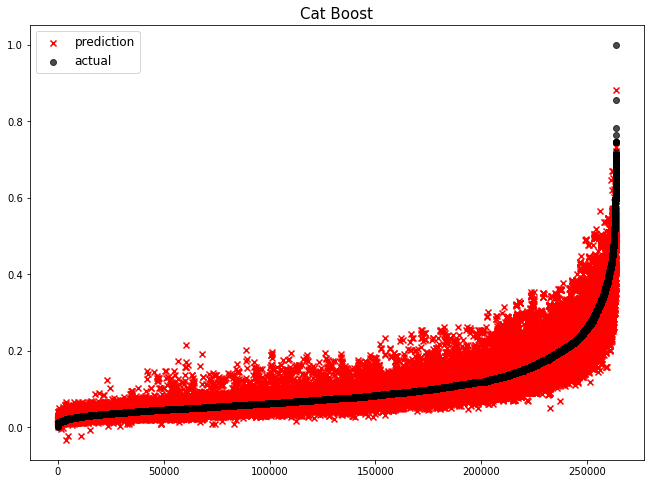

               model       mse
0  Linear Regression  0.002900
1           XG Boost  0.000717
2          Cat Boost  0.000633


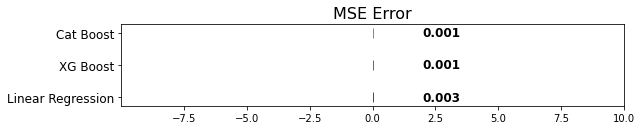

r2_score:  0.888763102426522
mean_squared_error:  0.0006334343874355423
mean_absolute_error:  0.015016855452928036
RMSE:  0.025168122445576712


In [ ]:
pred = model.predict(X_test)
mse_eval('Cat Boost', y_test, pred)

## Linear Regression

In [ ]:
x=step_df.drop(['transaction amount'],axis=1)
y=step_df['transaction amount']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

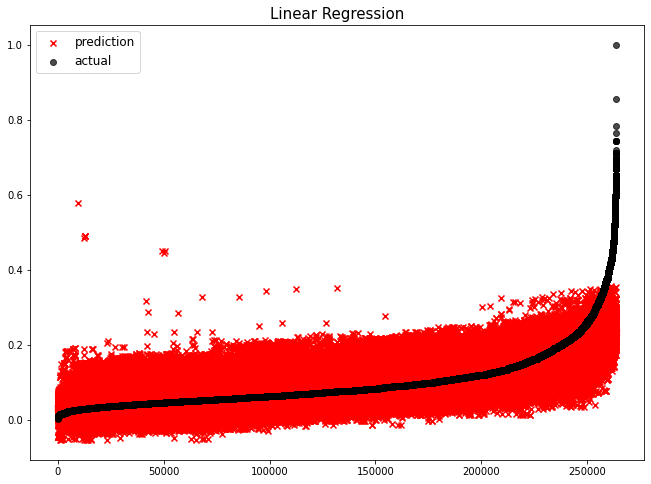

               model       mse
0  Linear Regression  0.002915
1           XG Boost  0.000717
2          Cat Boost  0.000633


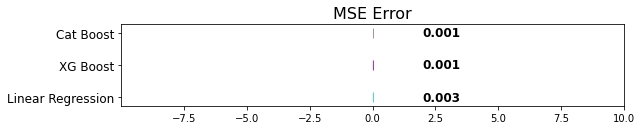

r2_score:  0.13132139263630427
mean_squared_error:  0.0029153447324095747
mean_absolute_error:  0.0369924593094339
RMSE:  0.05399393236660555


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_eval('Linear Regression', y_test, pred)

# L1 Regularization 모델 학습

## df -> l1_df로 복제 후 삭제

In [ ]:
l1_df = df.copy(deep=True)

In [ ]:
l1_df.drop(['const'],axis=1,inplace=True)

In [ ]:
l1_df

,number of households,number of parking spaces,apartment facilities,education facilities,traffic information,facilities,acreage,dedicated rate,number of rooms,transaction amount,floor,elapsed days,interest rate,employment rate,latitude,longitude,construction company top4,heating method individual heating,direction south facing,direction north facing,entrance structure corridor
0,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014214,0.125000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
1,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.006926,0.250000,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
2,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.012410,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
3,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.024531,0.236111,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
4,0.094737,0.046948,0.0,1.0,0.2500,0.714286,0.094595,0.300,0.166667,0.014286,0.166667,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878923,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.050505,0.125000,0.38,0.555556,0.222222,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878924,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.069986,0.111111,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878925,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.055123,0.166667,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0
878926,0.000421,0.051643,0.0,0.0,0.5625,0.000000,0.391892,0.675,0.500000,0.072150,0.083333,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0,0.0,0.0


## L1 Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
x=l1_df.drop(['transaction amount'],axis=1)
y=l1_df['transaction amount']

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

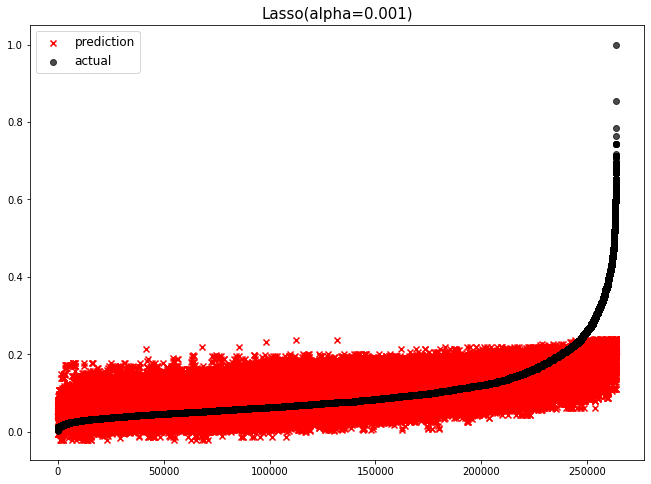

                model       mse
0      Lasso(alpha=1)  0.006286
1    Lasso(alpha=0.1)  0.006286
2   Lasso(alpha=0.01)  0.006102
3  Lasso(alpha=0.001)  0.003284
4   Linear Regression  0.002915
5            XG Boost  0.000717
6           Cat Boost  0.000633


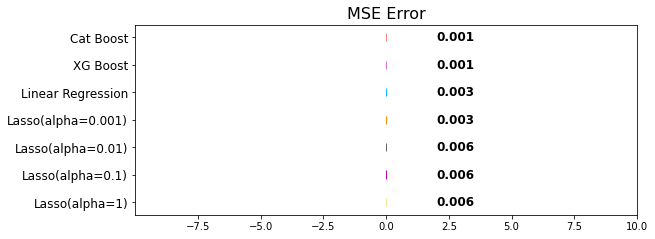

In [ ]:
import numpy as np

from sklearn.linear_model import Ridge
alphas = [1, 0.1, 0.01, 0.001]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    add_model('Lasso(alpha={})'.format(alpha), pred, y_test)
plot_all()

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(X_train, y_train)
lasso_pred_001 = lasso_001.predict(X_test)

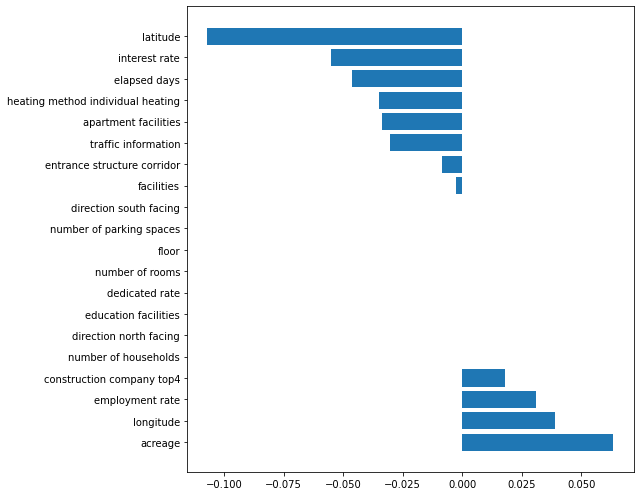

In [ ]:
plot_coef(X_train.columns, lasso_001.coef_)

In [ ]:
d = ['acreage','longitude','construction company top4','employment rate','facilitties','entrance structure corridor','traffic information','apartment facilities','heating method individual heating','elapsed days','interest rate','latitude','transaction amount']
print(len(d))

13


In [ ]:
for i in l1_df.columns:
  if i in d:
    continue
  else:
    l1_df.drop(i,axis = 1,inplace=True)

In [ ]:
len(l1_df.columns)

12

In [ ]:
l1_df

,apartment facilities,traffic information,acreage,transaction amount,elapsed days,interest rate,employment rate,latitude,longitude,construction company top4,heating method individual heating,entrance structure corridor
0,0.0,0.2500,0.094595,0.014214,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0
1,0.0,0.2500,0.094595,0.006926,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0
2,0.0,0.2500,0.094595,0.012410,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0
3,0.0,0.2500,0.094595,0.024531,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0
4,0.0,0.2500,0.094595,0.014286,0.62,0.888889,0.000000,0.849723,0.717488,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
878923,0.0,0.5625,0.391892,0.050505,0.38,0.555556,0.222222,0.254863,0.923133,0.0,1.0,0.0
878924,0.0,0.5625,0.391892,0.069986,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0
878925,0.0,0.5625,0.391892,0.055123,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0
878926,0.0,0.5625,0.391892,0.072150,0.38,0.777778,0.777778,0.254863,0.923133,0.0,1.0,0.0


## xgboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import numpy as np

#x,y값 결정
x=l1_df.drop(['transaction amount'],axis=1)
y=l1_df['transaction amount']

#데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)
#XG 라비브러리 사용 -> 학습률 0.08, subsample 0.75
#r : 클수록 변화율 낮춰줌,
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

615249 263679
[05:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.08, max_depth=7, subsample=0.75)

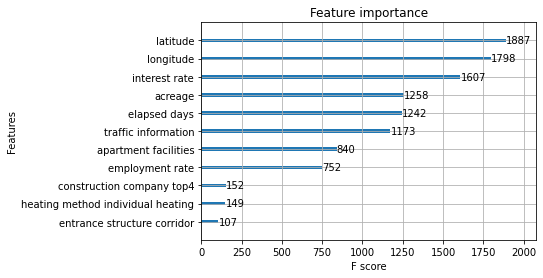

In [ ]:
#변수의 중요도를 구해주는 함수
xgboost.plot_importance(xgb_model)

In [ ]:
# 최상의 weight값이 몇이냐?
predictions = xgb_model.predict(X_test)
predictions

array([0.09131819, 0.07983267, 0.27106142, ..., 0.02566862, 0.18054792,
       0.07715797], dtype=float32)

In [ ]:
#R2 score 구해라 (1일수록 좋은거)
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_test,predictions))

0.8807126486565545
0.8796929358334687


In [ ]:
xgb_model.score(X_test, y_test)

0.8796912948088902

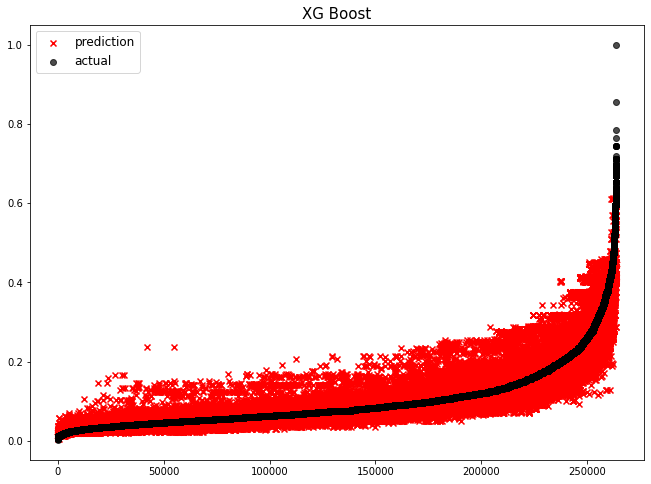

                model       mse
0      Lasso(alpha=1)  0.006286
1    Lasso(alpha=0.1)  0.006286
2   Lasso(alpha=0.01)  0.006102
3  Lasso(alpha=0.001)  0.003284
4   Linear Regression  0.002915
5            XG Boost  0.000756
6           Cat Boost  0.000633


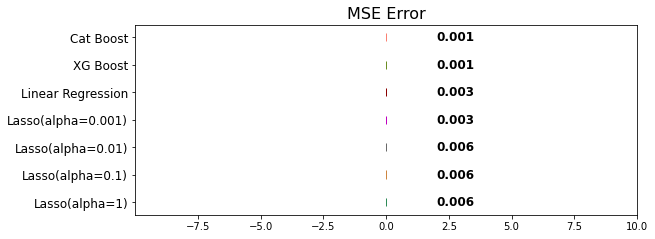

r2_score:  0.8611748636678336
mean_squared_error:  0.0007563149452832493
mean_absolute_error:  0.01637799910329654
RMSE:  0.027501180797981188


In [ ]:
pred = xgb_model.predict(X_test)
mse_eval('XG Boost', y_test, pred)

## catboost

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostRegressor, Pool
# Initialize data
x=l1_df.drop(['transaction amount'],axis=1)
y=l1_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=500,
                          learning_rate=1,
                          depth=7)
# Fit model
model.fit(X_train,y_train)
# Get predictions
r_sq = model.score(X_train, y_train)
print(r_sq)
model.score(X_test, y_test)

0:	learn: 0.0436592	total: 91.2ms	remaining: 45.5s
1:	learn: 0.0383758	total: 169ms	remaining: 42s
2:	learn: 0.0354321	total: 282ms	remaining: 46.7s
3:	learn: 0.0339782	total: 377ms	remaining: 46.8s
4:	learn: 0.0327355	total: 466ms	remaining: 46.1s
5:	learn: 0.0316424	total: 556ms	remaining: 45.8s
6:	learn: 0.0310885	total: 655ms	remaining: 46.2s
7:	learn: 0.0308511	total: 727ms	remaining: 44.7s
8:	learn: 0.0305929	total: 803ms	remaining: 43.8s
9:	learn: 0.0302575	total: 902ms	remaining: 44.2s
10:	learn: 0.0300113	total: 997ms	remaining: 44.3s
11:	learn: 0.0298002	total: 1.08s	remaining: 43.8s
12:	learn: 0.0294921	total: 1.18s	remaining: 44.2s
13:	learn: 0.0293474	total: 1.26s	remaining: 43.9s
14:	learn: 0.0291866	total: 1.35s	remaining: 43.6s
15:	learn: 0.0290374	total: 1.44s	remaining: 43.5s
16:	learn: 0.0289317	total: 1.53s	remaining: 43.4s
17:	learn: 0.0288126	total: 1.61s	remaining: 43.3s
18:	learn: 0.0287127	total: 1.7s	remaining: 43.1s
19:	learn: 0.0286390	total: 1.79s	remaining

0.8834919930882914

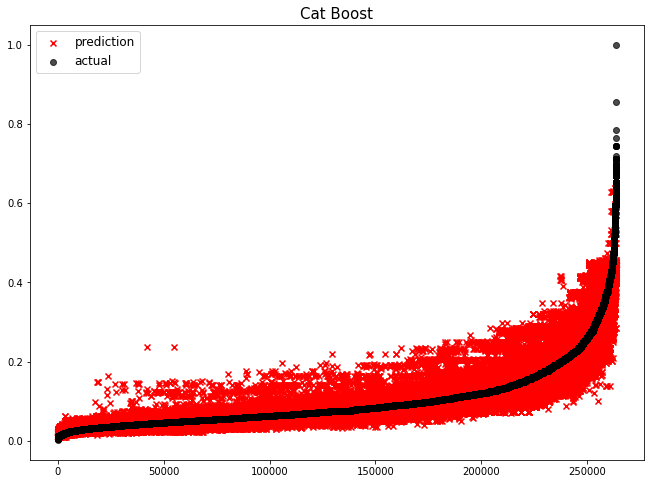

                model       mse
0      Lasso(alpha=1)  0.006286
1    Lasso(alpha=0.1)  0.006286
2   Lasso(alpha=0.01)  0.006102
3  Lasso(alpha=0.001)  0.003284
4   Linear Regression  0.002915
5            XG Boost  0.000756
6           Cat Boost  0.000732


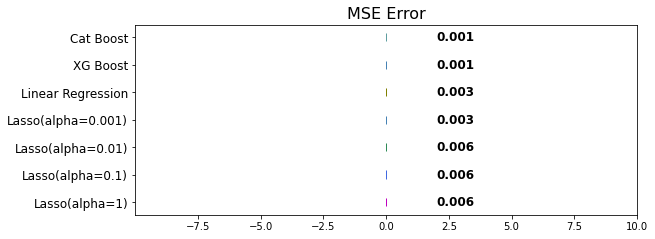

r2_score:  0.868829989185658
mean_squared_error:  0.0007324220365643221
mean_absolute_error:  0.01582461816041282
RMSE:  0.0270632968531981


In [ ]:
pred = model.predict(X_test)
mse_eval('Cat Boost', y_test, pred)

## Linear Regression

In [ ]:
x=l1_df.drop(['transaction amount'],axis=1)
y=l1_df['transaction amount']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3, shuffle=True, random_state=1)

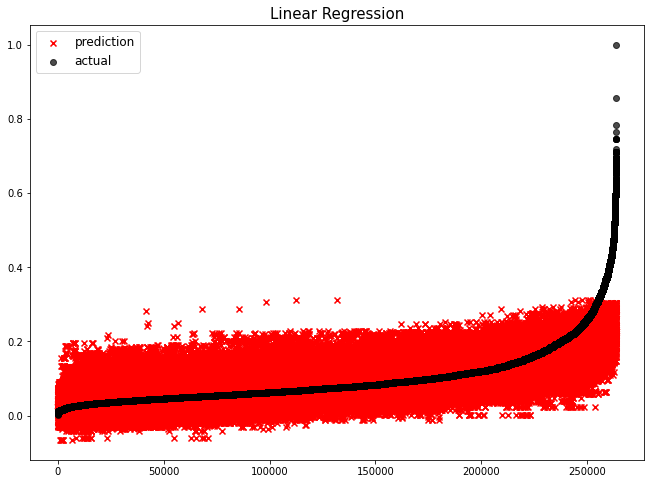

                model       mse
0      Lasso(alpha=1)  0.006286
1    Lasso(alpha=0.1)  0.006286
2   Lasso(alpha=0.01)  0.006102
3  Lasso(alpha=0.001)  0.003284
4   Linear Regression  0.003069
5            XG Boost  0.000756
6           Cat Boost  0.000732


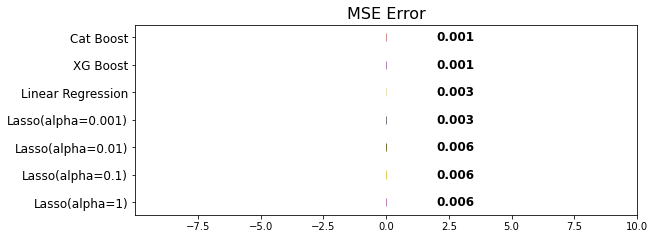

r2_score:  0.04300775719649086
mean_squared_error:  0.003068648765445463
mean_absolute_error:  0.037997461373202764
RMSE:  0.05539538577756691


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse_eval('Linear Regression', y_test, pred)